# PPT → Markdown (v3: Better Text Joining + Tables + Equations)

**Source**: `[8차시] LV3_2-5 고급 추정법_0827_완.pptx`

개선 사항:
- **폰트/스타일로 분리된 run들을 문장 단위로 매끄럽게 연결**
- 줄바꿈(br) 보존, 불필요한 공백 정리, 소프트 하이픈 제거
- bullet(기본) 감지 후 접두사 적용
- 기존 이미지/테이블/수식/헤더 로직 그대로 유지

### Slide 1: (Untitled)

- 08. 고급 추정법


### Slide 2: (Untitled)

- 1
- 기대값 최대화 알고리즘
- 기대값 최대화 알고리즘(Expectation Maximization Algorithm)
- 잠재 변수가 포함된 확률 모델에서 모수를 추정하기 위한 방법
- Ex) 가우시안 혼합 분포 모델(Gaussian Mixture Model)

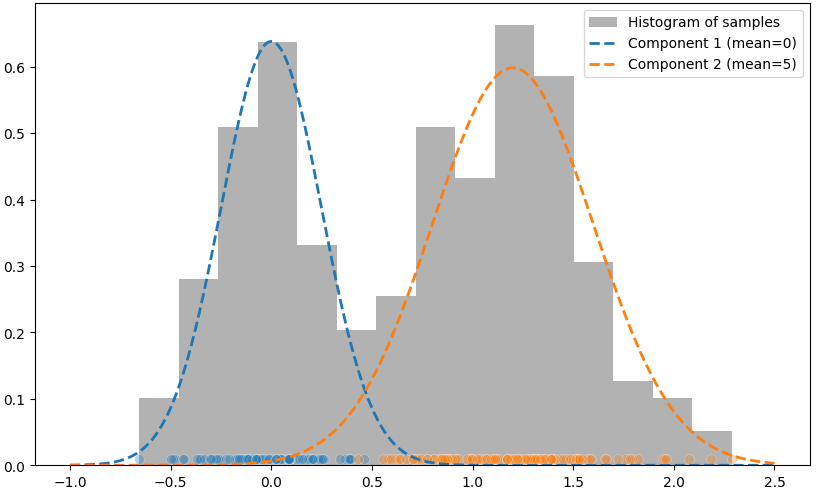
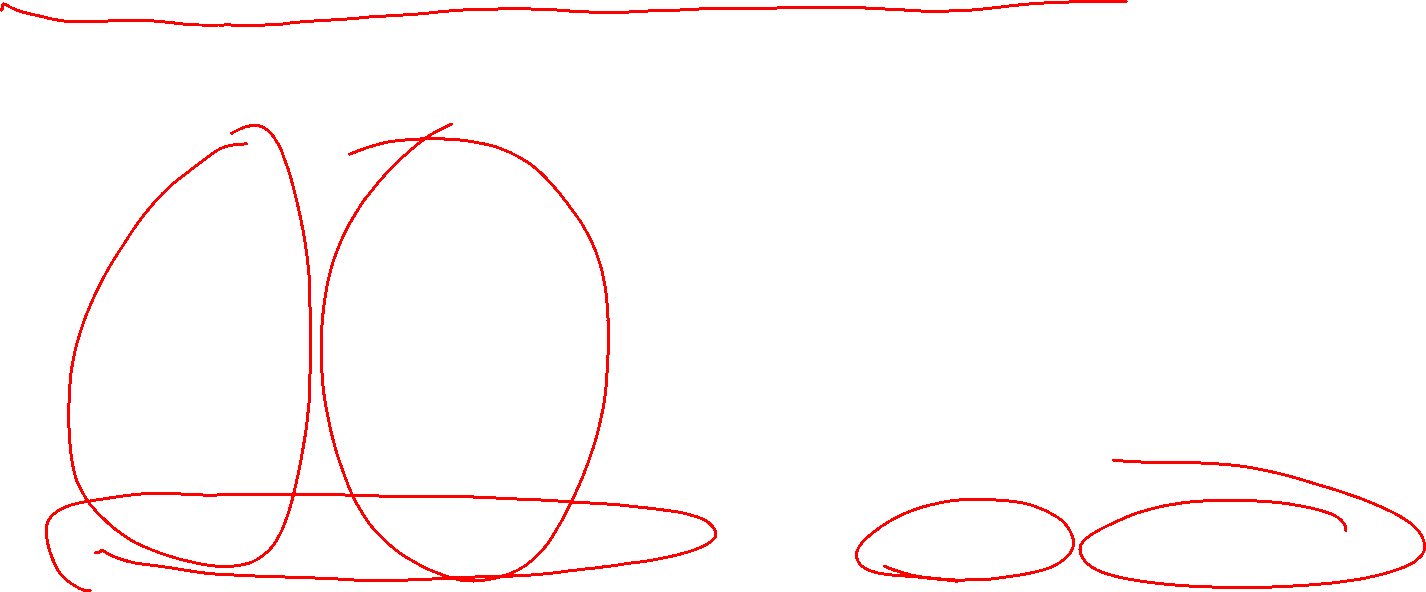
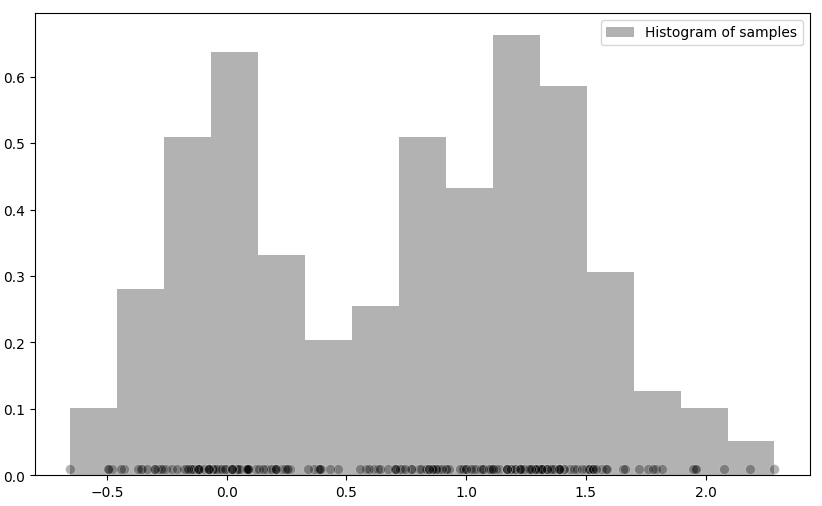


### Slide 3: (Untitled)

- 1
- 기대값 최대화 알고리즘
- Ex) 가우시안 혼합 분포 모델(Gaussian Mixture Model)
- 관측 데이터:
- 잠재 변수:
- 모델 파라메터: θ
- 두 개의 가우시안 분포의 혼합 모델
- 소속 분포

**Equation 3.1**
$$
𝑋={𝑥1, 𝑥2,…,𝑥𝑁}
$$

**Equation 3.2**
$$
𝑍={𝑧1, 𝑧2,…,𝑧𝑁}
$$

**Equation 3.3**
$$
𝜇2,𝜎22
$$

**Equation 3.4**
$$
𝜇1,𝜎12
$$

**Equation 3.5**
$$
𝜇2,𝜎22
$$

**Equation 3.6**
$$
𝜇1,𝜎12
$$

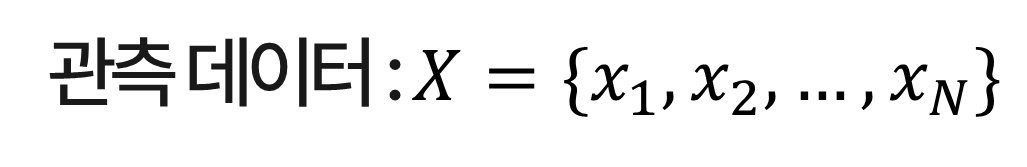
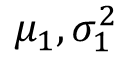
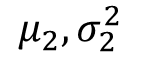
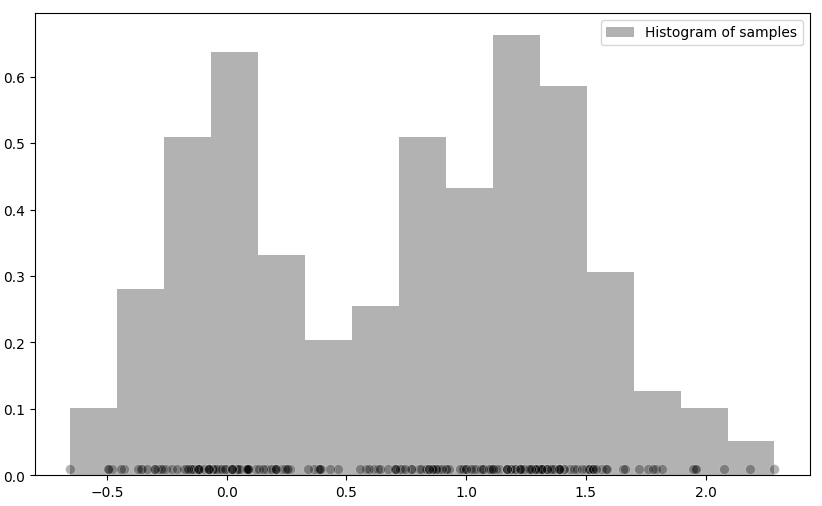
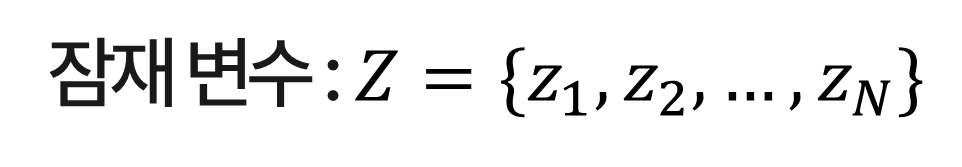
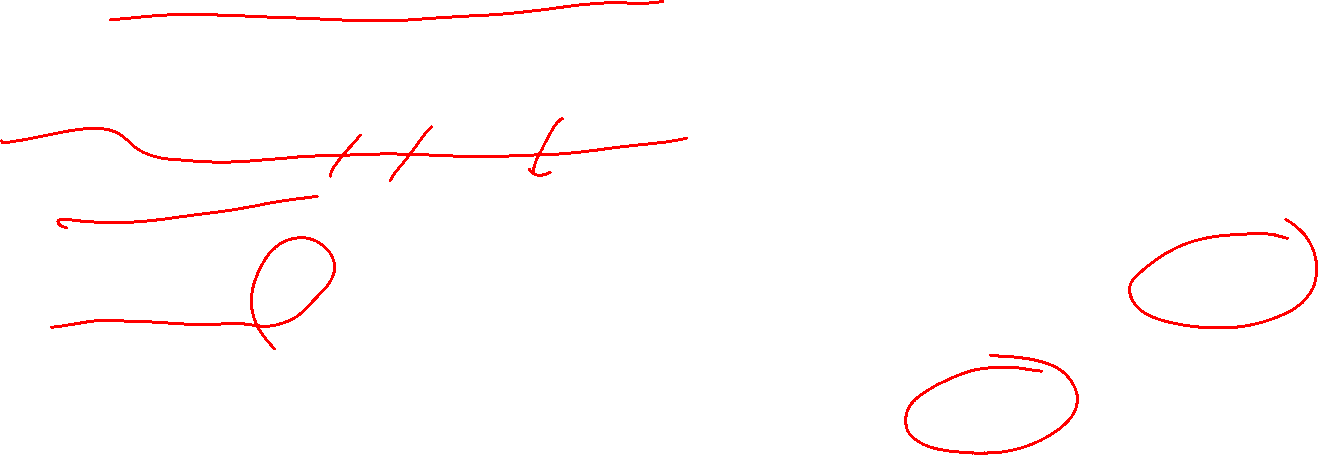


### Slide 4: (Untitled)

- 𝑄(𝜃′|𝜃) 를 최대화하는 θ’ 유도
- 1
- 기대값 최대화 알고리즘
- 문제 모델링
- 2. 최대화 단계(Maximization, M step)
- 알고리즘 수행
- 1. 모수(θ) 초기화
- 2. 계산
- 3. 를 업데이트
- 4. 종료 조건을 만족할 때까지, 2 부터 반복
- 문제에 따라 전역 최적해를 보장하지는 않음
- 관측값(X)와 θ 일 때의 잠재 변수 분포에서,
- 완전 로그 우도 함수 의 기대값을 계산
- 1. 기대값 단계(Expectation, E step)

**Equation 4.1**
$$
𝜃′=𝑎𝑟𝑔𝑚𝑎𝑥𝜃′𝑄(𝜃′|𝜃)
$$

**Equation 4.2**
$$
𝜃′
$$

**Equation 4.3**
$$
𝜃
$$

**Equation 4.4**
$$
𝜃′로
$$

**Equation 4.5**
$$
𝑄𝜃′𝜃=𝐸𝑍|𝑋,𝜃[log𝑃𝑋,𝑍𝜃′]
$$

**Equation 4.6**
$$
log𝑃𝑋,𝑍𝜃′
$$

**Equation 4.7**
$$
𝜃′=𝑎𝑟𝑔𝑚𝑎𝑥𝜃′𝑄(𝜃′|𝜃)
$$

**Equation 4.8**
$$
𝑄𝜃′𝜃=𝐸𝑍|𝑋,𝜃[log𝑃𝑋,𝑍𝜃′]
$$

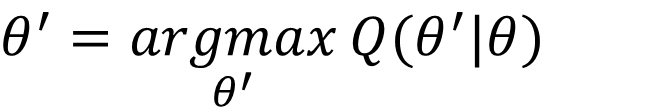
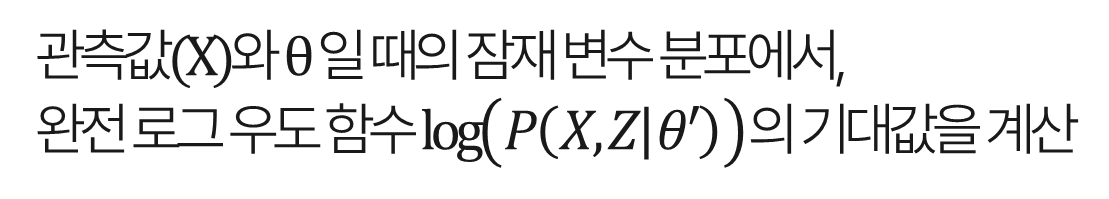
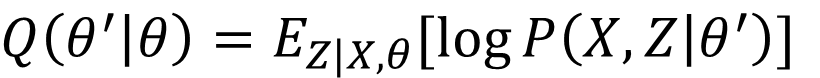
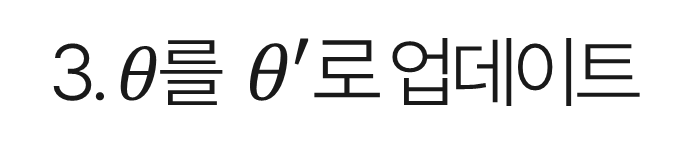
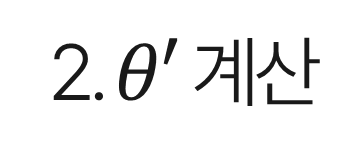
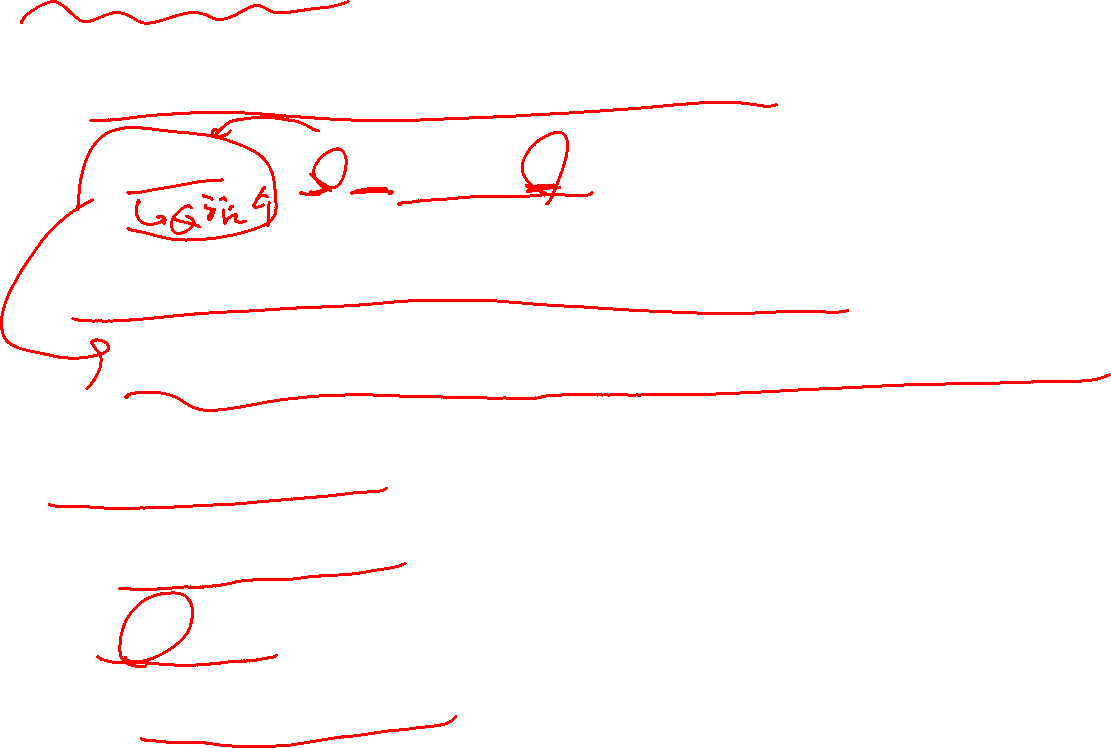


### Slide 5: (Untitled)

- 1
- 기대값 최대화 알고리즘
- 가우시안 혼합 분포 모델(Gaussian Mixture Model)
- 잠재 변수
- 확률 변수 X 의 소속 분포
- , C 는 분포의 수
- 가 서로 독립이라면,

**Equation 5.1**
$$
𝐗={𝑥1, 𝑥2,…,𝑥𝑁}
$$

**Equation 5.2**
$$
𝐙={𝑧1, 𝑧2,…,𝑧𝑁}
$$

**Equation 5.3**
$$
𝑧𝑖∈ 1, …,𝐶
$$

**Equation 5.4**
$$
𝑄𝜃′𝜃=𝐸𝑍|𝑋,𝜃[log𝑃𝐗,𝐙𝜃′]
$$

**Equation 5.5**
$$
=𝑖=1𝐶𝑓(𝑍=𝑖|𝐗,𝜃)[log𝑓𝐗,𝑍=𝑖 𝜃′]
$$

**Equation 5.6**
$$
𝑥𝑖
$$

**Equation 5.7**
$$
=𝑗=1𝑁𝑖=1𝐶𝑓(𝑍𝑗=𝑖|𝑋=𝑥𝑗,𝜃)[log𝑓𝑋=𝑥𝑗,𝑍𝑗=𝑖𝜃′]
$$

**Equation 5.8**
$$
𝐗={𝑥1, 𝑥2,…,𝑥𝑁}
$$

**Equation 5.9**
$$
𝐙={𝑧1, 𝑧2,…,𝑧𝑁}
$$

**Equation 5.10**
$$
𝑄𝜃′𝜃=𝐸𝑍|𝑋,𝜃[log𝑃𝐗,𝐙𝜃′]
$$

**Equation 5.11**
$$
=𝑖=1𝐶𝑓(𝑍=𝑖|𝐗,𝜃)[log𝑓𝐗,𝑍=𝑖 𝜃′]
$$

**Equation 5.12**
$$
=𝑗=1𝑁𝑖=1𝐶𝑓(𝑍𝑗=𝑖|𝑋=𝑥𝑗,𝜃)[log𝑓𝑋=𝑥𝑗,𝑍𝑗=𝑖𝜃′]
$$

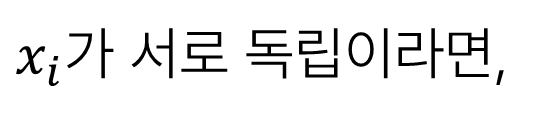
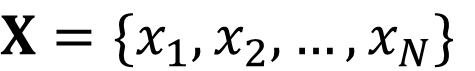
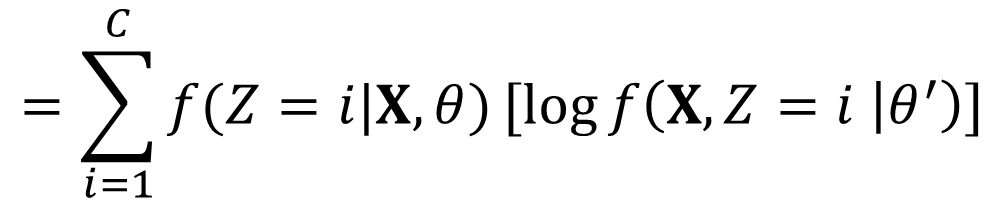
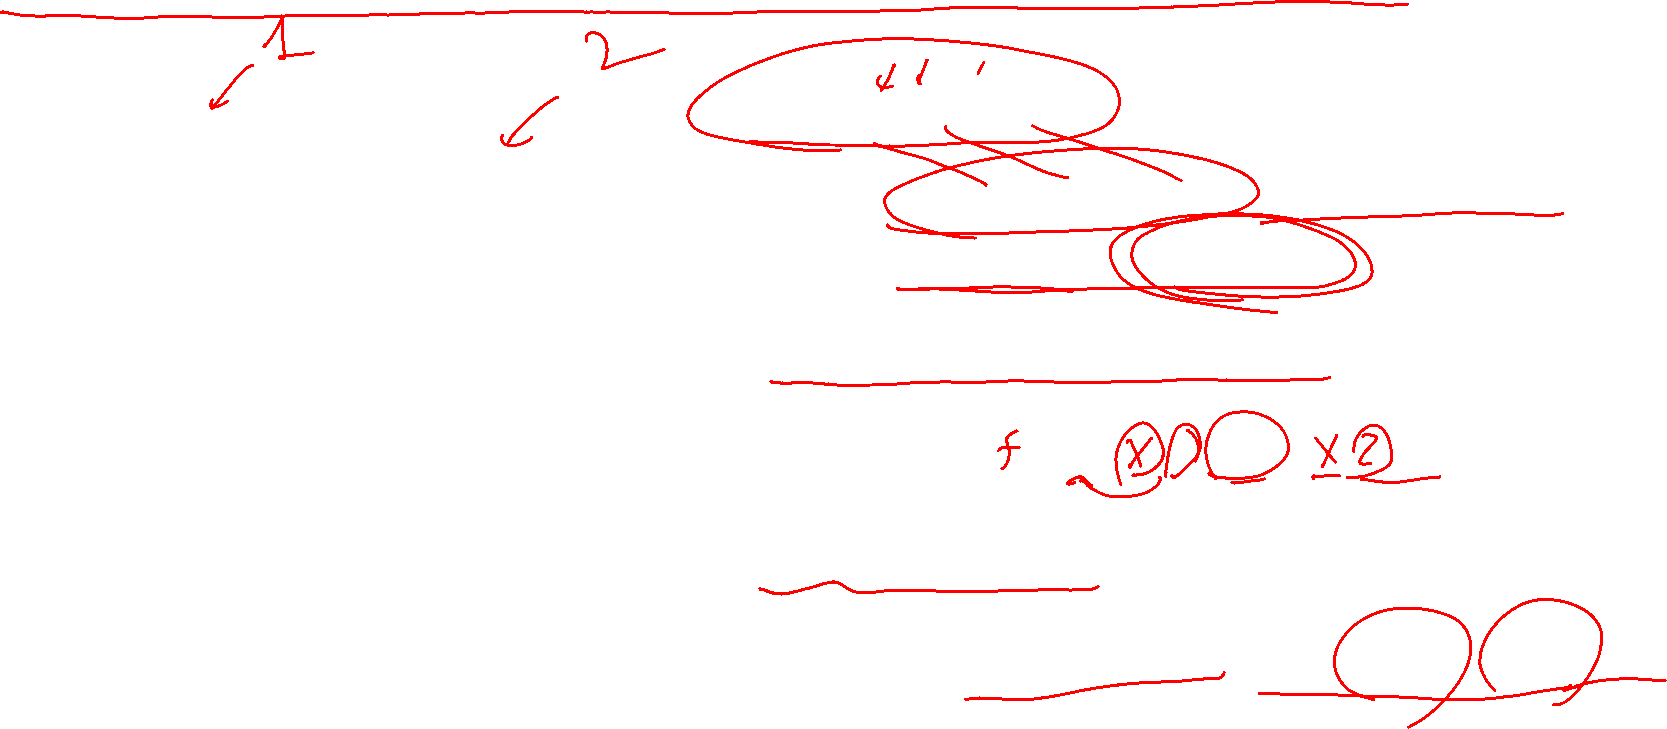
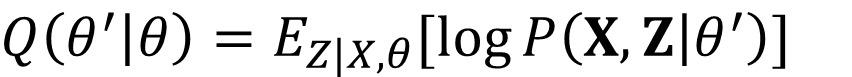
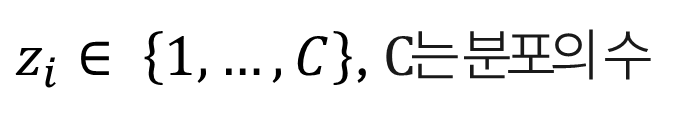
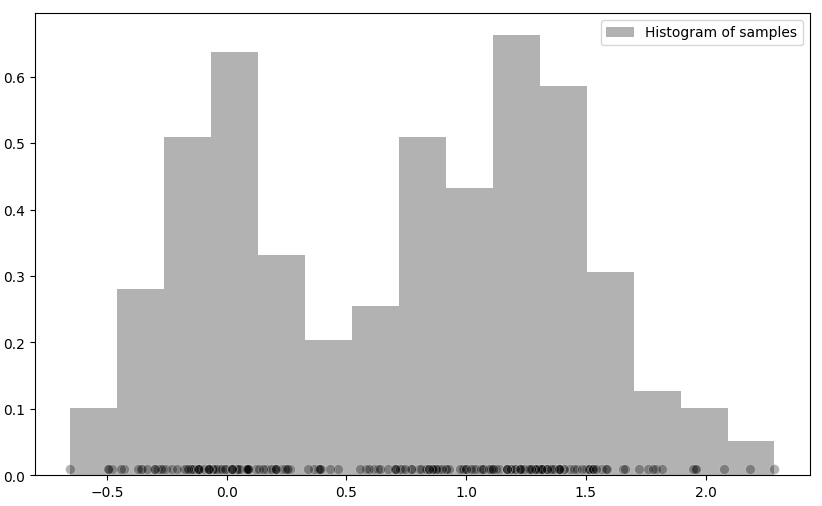
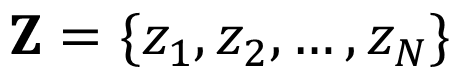
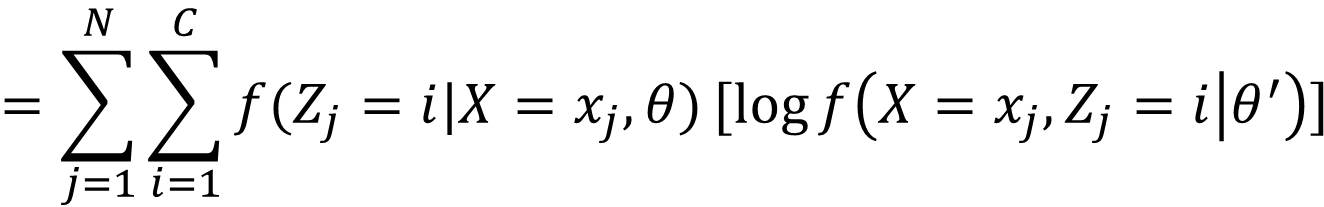


### Slide 6: (Untitled)

- 1
- 기대값 최대화 알고리즘
- Expectation Step I
- Gaussian Mixture Model 의 모수 θ 의 구성

**Equation 6.1**
$$
𝑃𝑍𝑗=𝑖=𝜏𝑖
$$

**Equation 6.2**
$$
𝑋=𝑥𝑗|𝑍𝑗=𝑖 ~ 𝑁(𝜇𝑖,𝜎𝑖2)
$$

**Equation 6.3**
$$
𝑓𝑍𝑗=𝑖𝑋=𝑥𝑗,𝜃=𝜏𝑗𝑖=12𝜋𝜎𝑖2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑖𝜎𝑖2𝜏𝑖𝑘=1𝐶12𝜋𝜎𝑘2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑘𝜎𝑘2𝜏𝑘
$$

**Equation 6.4**
$$
𝑓𝑍𝑗=𝑖𝑋=𝑥𝑗,𝜃=𝑓𝑍𝑗=𝑖,𝑋=𝑥𝑗𝜃𝑓(𝑋=𝑥𝑗|𝜃)
$$

**Equation 6.5**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶𝑓𝑍𝑗=𝑖𝑋=𝑥𝑗,𝜃[log𝑓𝑋=𝑥𝑗,𝑍𝑗=𝑖𝜃′]
$$

**Equation 6.6**
$$
=𝑓𝑋=𝑥𝑗𝑍𝑗=𝑖,𝜃𝑃(𝑍𝑗=𝑖|𝜃)𝑘=1𝐶𝑓𝑋=𝑥𝑗𝑍𝑗=𝑘,𝜃𝑃(𝑍𝑗=𝑘|𝜃)
$$

**Equation 6.7**
$$
𝑃𝑍𝑗=𝑖=𝜏𝑖
$$

**Equation 6.8**
$$
𝑋=𝑥𝑗|𝑍𝑗=𝑖 ~ 𝑁(𝜇𝑖,𝜎𝑖2)
$$

**Equation 6.9**
$$
𝑓𝑍𝑗=𝑖𝑋=𝑥𝑗,𝜃=𝜏𝑗𝑖=12𝜋𝜎𝑖2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑖𝜎𝑖2𝜏𝑖𝑘=1𝐶12𝜋𝜎𝑘2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑘𝜎𝑘2𝜏𝑘
$$

**Equation 6.10**
$$
𝑓𝑍𝑗=𝑖𝑋=𝑥𝑗,𝜃=𝑓𝑍𝑗=𝑖,𝑋=𝑥𝑗𝜃𝑓(𝑋=𝑥𝑗|𝜃)
$$

**Equation 6.11**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶𝑓𝑍𝑗=𝑖𝑋=𝑥𝑗,𝜃[log𝑓𝑋=𝑥𝑗,𝑍𝑗=𝑖𝜃′]
$$

**Equation 6.12**
$$
=𝑓𝑋=𝑥𝑗𝑍𝑗=𝑖,𝜃𝑃(𝑍𝑗=𝑖|𝜃)𝑘=1𝐶𝑓𝑋=𝑥𝑗𝑍𝑗=𝑘,𝜃𝑃(𝑍𝑗=𝑘|𝜃)
$$

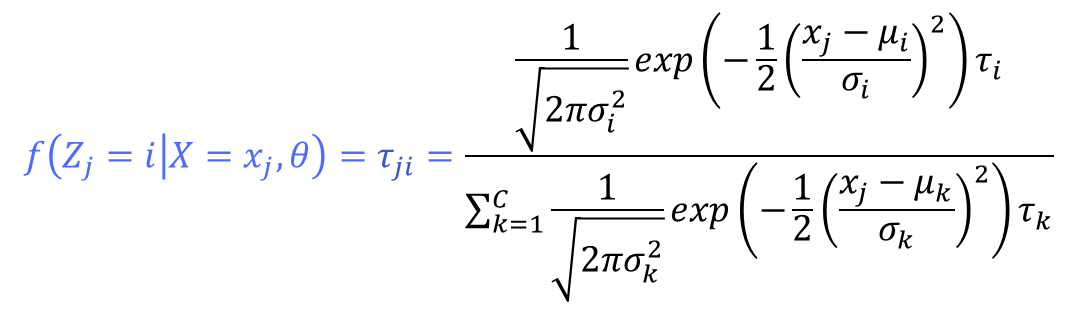
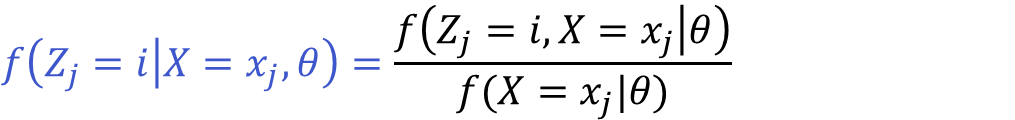
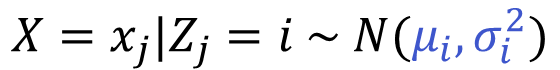
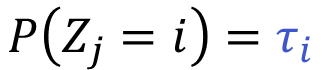
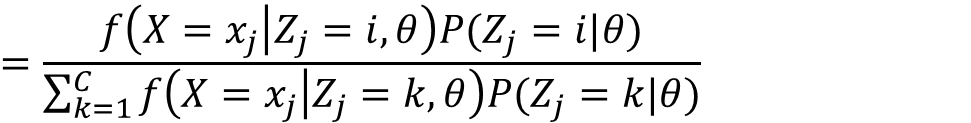
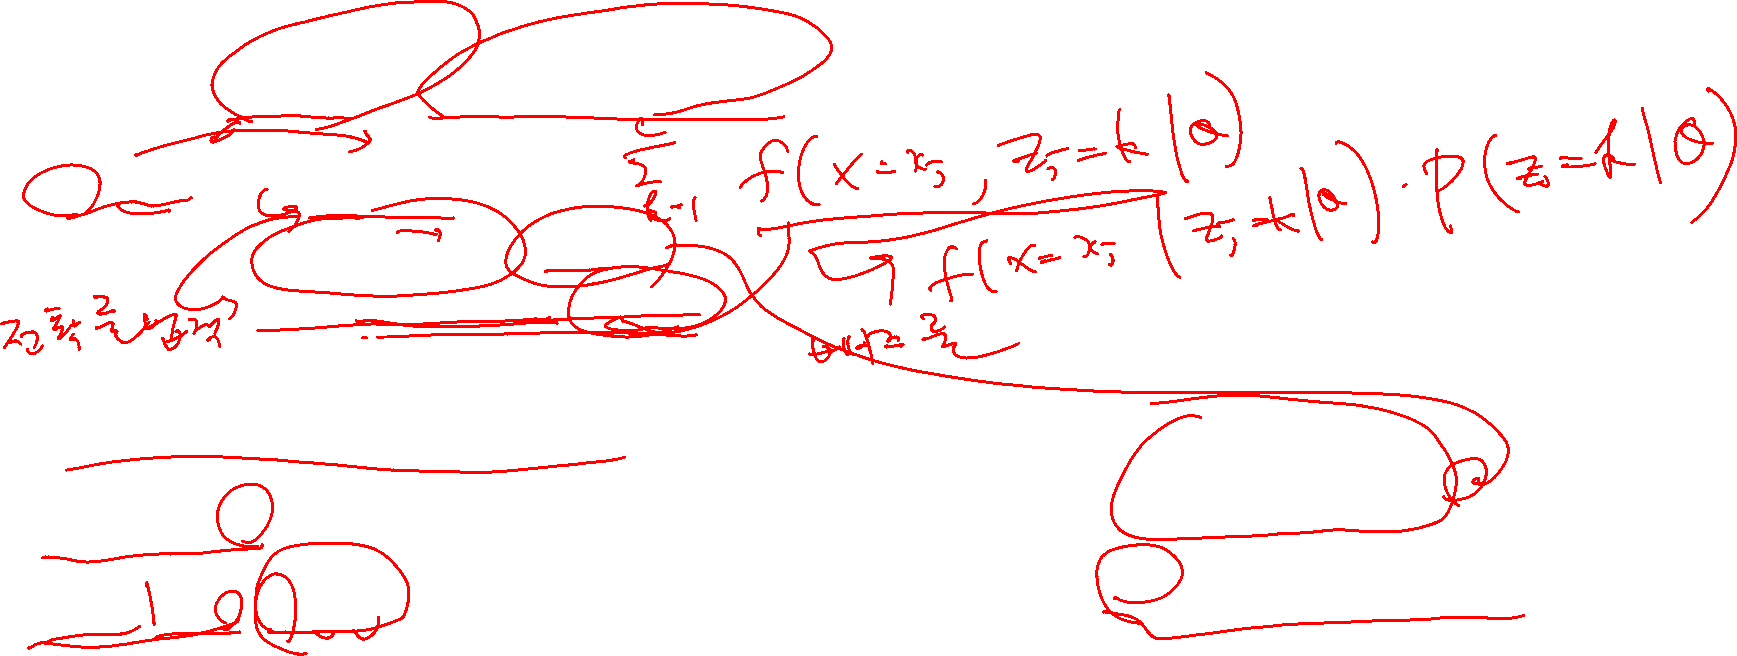
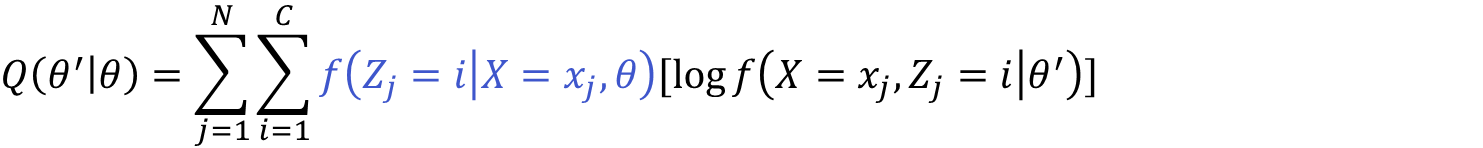


### Slide 7: (Untitled)

- 1
- 기대값 최대화 알고리즘
- Expectation Step II
- 일 때,

**Equation 7.1**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖[log𝑓𝑋=𝑥𝑗,𝑍𝑗=𝑖𝜃′]
$$

**Equation 7.2**
$$
log𝑓𝑋=𝑥𝑗,𝑍𝑗=𝑖𝜃′=log⁡𝑓𝑋=𝑥𝑗𝑍𝑗=𝑖,𝜃′𝑃(𝑍𝑗=𝑖|𝜃′)
$$

**Equation 7.3**
$$
=log𝑓𝑋=𝑥𝑗𝑍𝑗=𝑖,𝜃′+𝑙𝑜𝑔𝑃(𝑍𝑗=𝑖|𝜃′)
$$

**Equation 7.4**
$$
𝑃𝑍𝑗=𝑖=𝜏𝑖′
$$

**Equation 7.5**
$$
𝑋=𝑥𝑗|𝑍𝑗=𝑖 ~ 𝑁(𝜇𝑖′,𝜎𝑖′2)
$$

**Equation 7.6**
$$
=log12𝜋𝜎𝑖′2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2 +𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 7.7**
$$
=−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 7.8**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖[log𝑓𝑋=𝑥𝑗,𝑍𝑗=𝑖𝜃′]
$$

**Equation 7.9**
$$
log𝑓𝑋=𝑥𝑗,𝑍𝑗=𝑖𝜃′=log⁡𝑓𝑋=𝑥𝑗𝑍𝑗=𝑖,𝜃′𝑃(𝑍𝑗=𝑖|𝜃′)
$$

**Equation 7.10**
$$
=log𝑓𝑋=𝑥𝑗𝑍𝑗=𝑖,𝜃′+𝑙𝑜𝑔𝑃(𝑍𝑗=𝑖|𝜃′)
$$

**Equation 7.11**
$$
𝑃𝑍𝑗=𝑖=𝜏𝑖′
$$

**Equation 7.12**
$$
𝑋=𝑥𝑗|𝑍𝑗=𝑖 ~ 𝑁(𝜇𝑖′,𝜎𝑖′2)
$$

**Equation 7.13**
$$
=log12𝜋𝜎𝑖′2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2 +𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 7.14**
$$
=−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

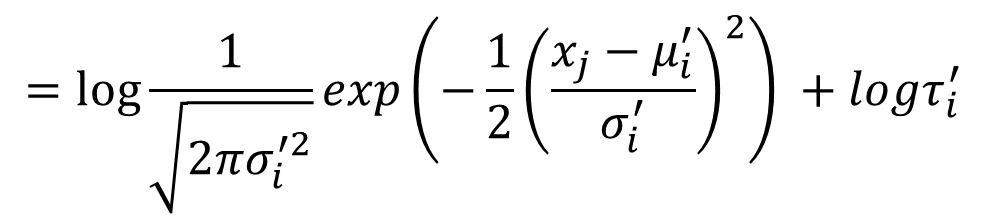
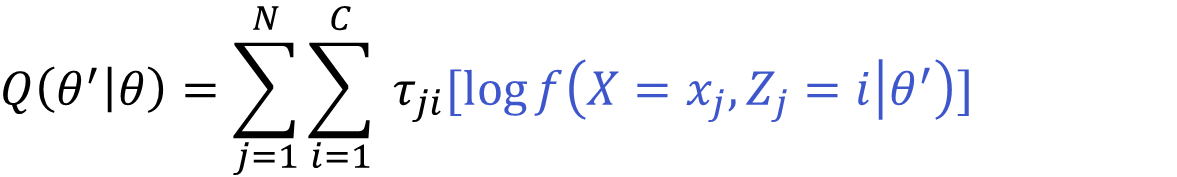
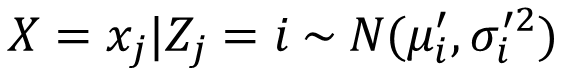
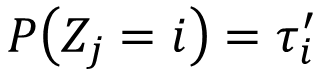
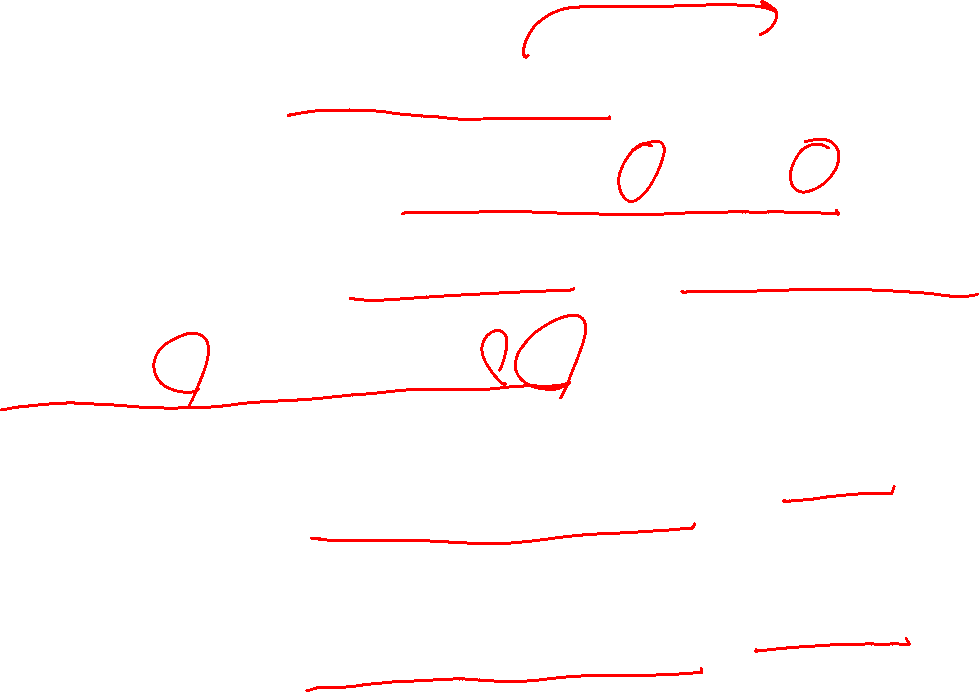
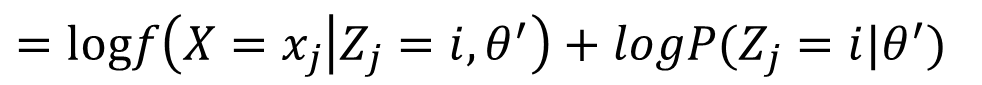
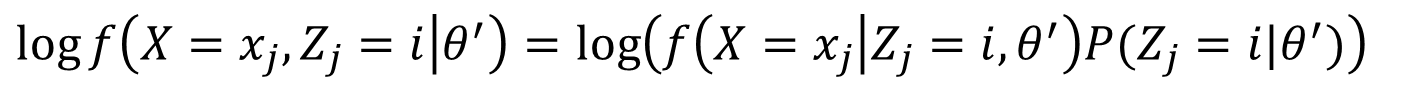
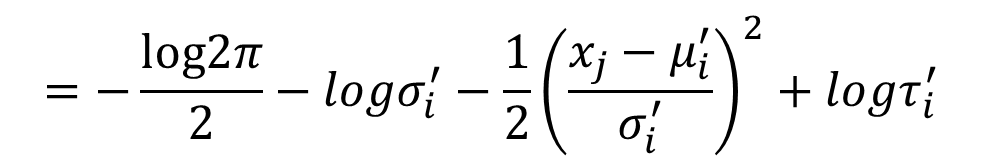


### Slide 8: (Untitled)

- 1
- 기대값 최대화 알고리즘
- Maximization Step:
- 라그랑주 승수법,
- 제약식에 대입
- , where

**Equation 8.1**
$$
𝝉𝒌′
$$

**Equation 8.2**
$$
𝜏𝑘′=1𝑛𝑗=1𝑁𝜏𝑗𝑘
$$

**Equation 8.3**
$$
𝐿(𝜏𝑖′,𝜆)=𝑗=1𝑁𝜏𝑗𝑘𝑙𝑜𝑔𝜏𝑘′+𝜆(1−𝑖=1𝐶𝜏𝑖′)
$$

**Equation 8.4**
$$
𝜕𝐿𝜕𝜏𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝜏𝑘′−𝜆=0
$$

**Equation 8.5**
$$
𝜏𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝜆
$$

**Equation 8.6**
$$
𝜆=𝑛
$$

**Equation 8.7**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 8.8**
$$
𝜏𝑘′=argmax𝜏𝑘′𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 8.9**
$$
𝑖=1𝐶𝜏𝑖′=1
$$

**Equation 8.10**
$$
𝑗𝑁𝑖=1𝐶 =argmax𝜏𝑘′𝑗=1𝑁𝑖=1𝐶𝜏𝑗𝑖𝑙𝑜𝑔𝜏𝑖′=argmax𝜏𝑘′𝑗=1𝑁𝜏𝑗𝑘𝑙𝑜𝑔𝜏𝑘′
$$

**Equation 8.11**
$$
𝜏𝑘′=1𝑛𝑗=1𝑁𝜏𝑗𝑘
$$

**Equation 8.12**
$$
𝐿(𝜏𝑖′,𝜆)=𝑗=1𝑁𝜏𝑗𝑘𝑙𝑜𝑔𝜏𝑘′+𝜆(1−𝑖=1𝐶𝜏𝑖′)
$$

**Equation 8.13**
$$
𝜕𝐿𝜕𝜏𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝜏𝑘′−𝜆=0
$$

**Equation 8.14**
$$
𝜏𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝜆
$$

**Equation 8.15**
$$
𝜆=𝑛
$$

**Equation 8.16**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 8.17**
$$
𝜏𝑘′=argmax𝜏𝑘′𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 8.18**
$$
𝑖=1𝐶𝜏𝑖′=1
$$

**Equation 8.19**
$$
𝑗𝑁𝑖=1𝐶 =argmax𝜏𝑘′𝑗=1𝑁𝑖=1𝐶𝜏𝑗𝑖𝑙𝑜𝑔𝜏𝑖′=argmax𝜏𝑘′𝑗=1𝑁𝜏𝑗𝑘𝑙𝑜𝑔𝜏𝑘′
$$

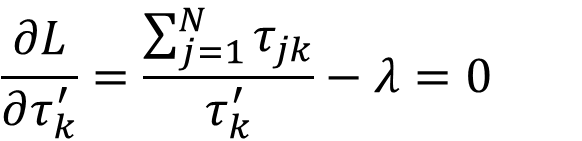
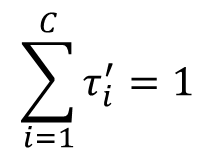
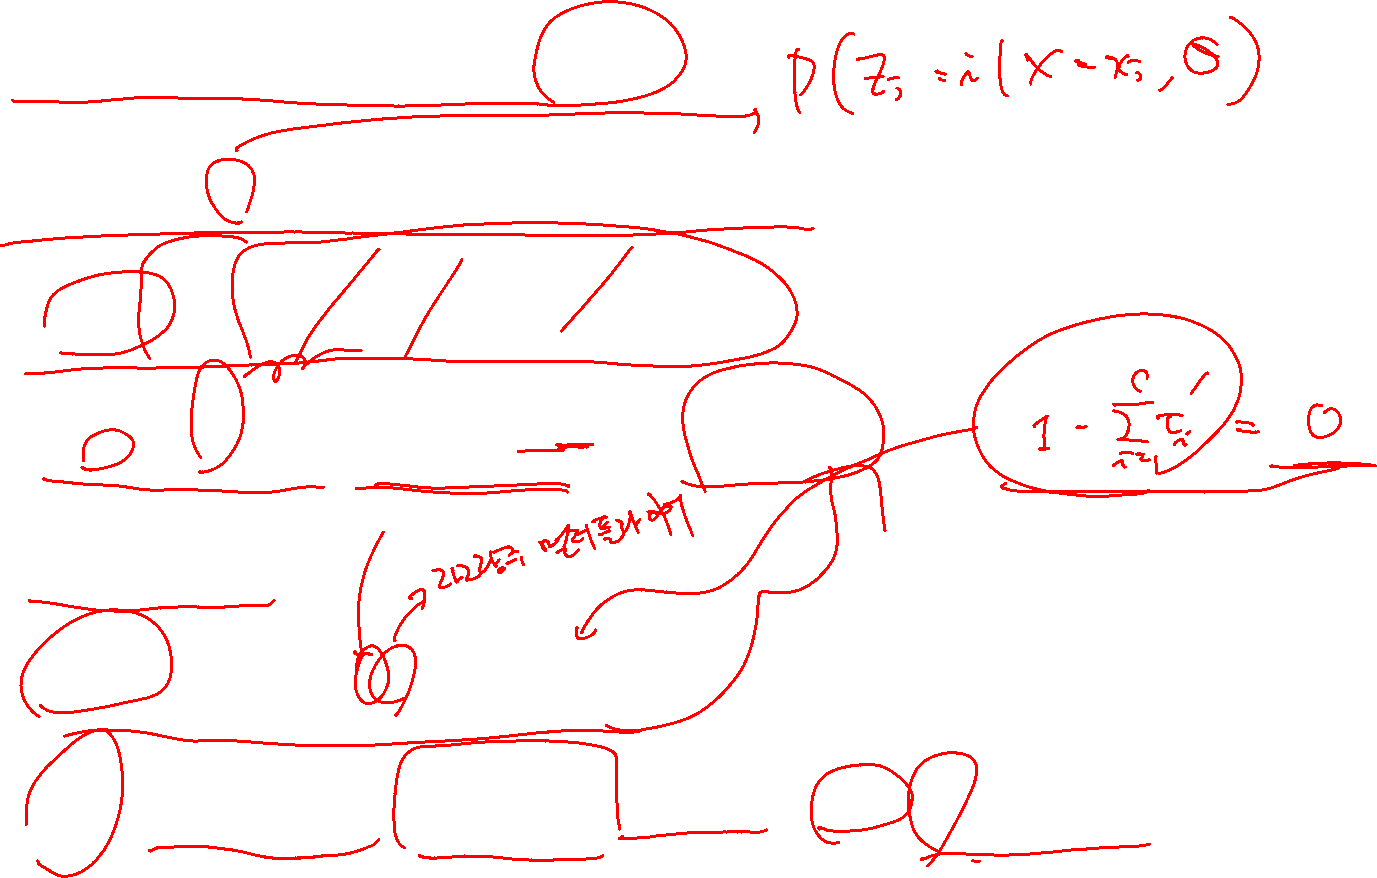
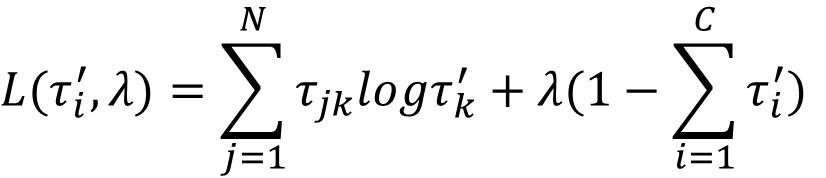
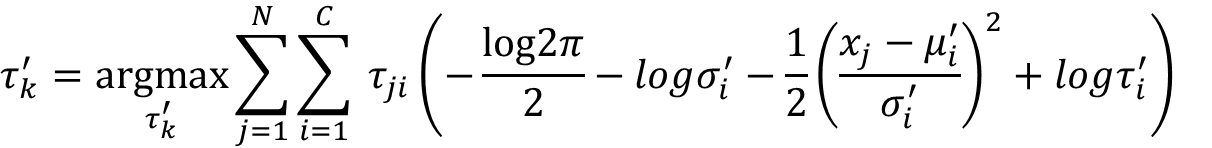
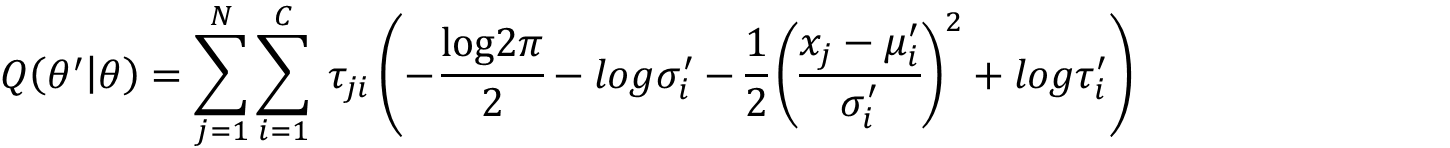
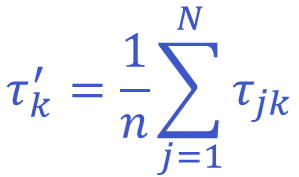
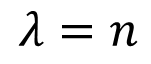
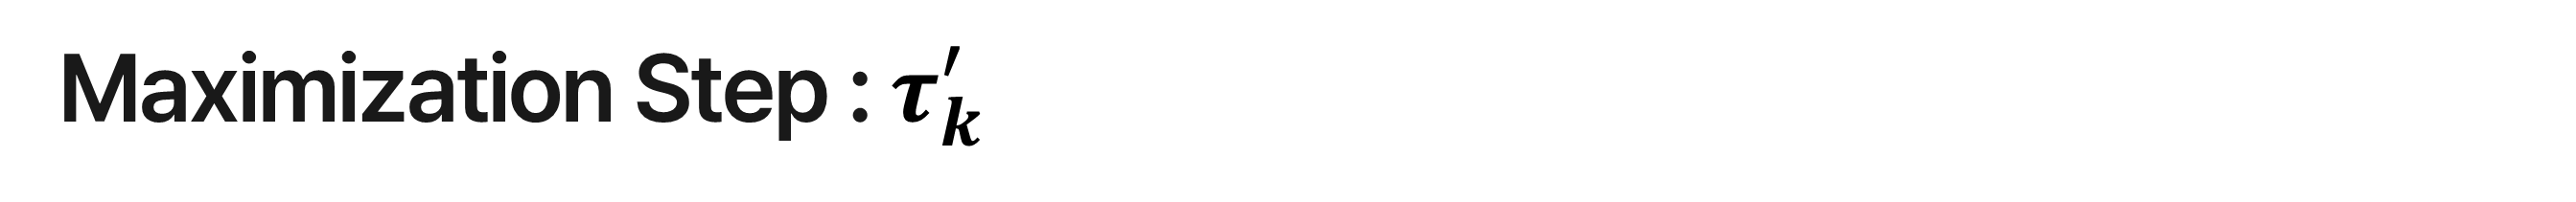
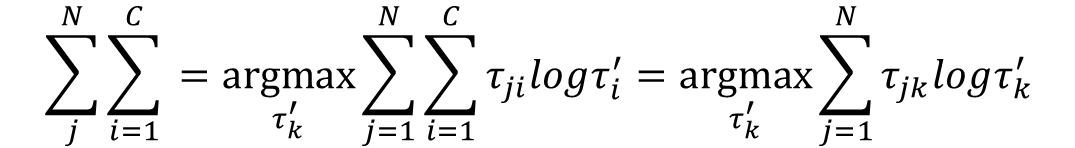
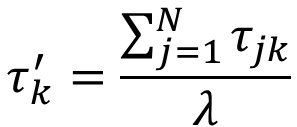


### Slide 9: (Untitled)

- 1
- 기대값 최대화 알고리즘
- Maximization Step:

**Equation 9.1**
$$
𝝁𝒌′
$$

**Equation 9.2**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 9.3**
$$
𝜇𝑘′=argmax𝜇𝑘′𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2=argmax𝜇𝑘′𝑗=1𝑁𝜏𝑗𝑖−12𝑥𝑗−𝜇𝑘′𝜎𝑘′2
$$

**Equation 9.4**
$$
𝜇𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝑥𝑗𝑗=1𝑁𝜏𝑗𝑘
$$

**Equation 9.5**
$$
𝑄𝜇𝑘′=𝑗=1𝑁𝜏𝑗𝑖−12𝑥𝑗−𝜇𝑘′𝜎𝑘′2
$$

**Equation 9.6**
$$
𝜕𝑄𝜇𝑘′𝜕𝜇𝑘′=𝑗=1𝑁𝜏𝑗𝑖𝑥𝑗−𝜇𝑘′𝜎𝑘′=0
$$

**Equation 9.7**
$$
𝑗=1𝑁𝜏𝑗𝑖𝑥𝑗−𝜇𝑘′=0
$$

**Equation 9.8**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 9.9**
$$
𝜇𝑘′=argmax𝜇𝑘′𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2=argmax𝜇𝑘′𝑗=1𝑁𝜏𝑗𝑖−12𝑥𝑗−𝜇𝑘′𝜎𝑘′2
$$

**Equation 9.10**
$$
𝜇𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝑥𝑗𝑗=1𝑁𝜏𝑗𝑘
$$

**Equation 9.11**
$$
𝑄𝜇𝑘′=𝑗=1𝑁𝜏𝑗𝑖−12𝑥𝑗−𝜇𝑘′𝜎𝑘′2
$$

**Equation 9.12**
$$
𝜕𝑄𝜇𝑘′𝜕𝜇𝑘′=𝑗=1𝑁𝜏𝑗𝑖𝑥𝑗−𝜇𝑘′𝜎𝑘′=0
$$

**Equation 9.13**
$$
𝑗=1𝑁𝜏𝑗𝑖𝑥𝑗−𝜇𝑘′=0
$$

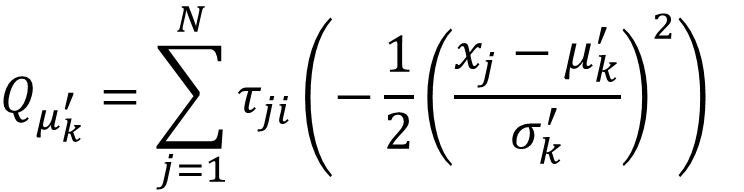
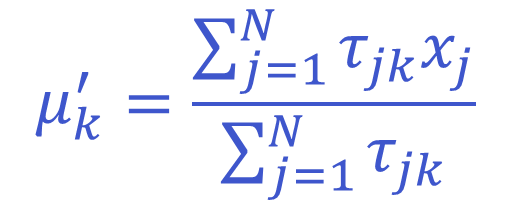
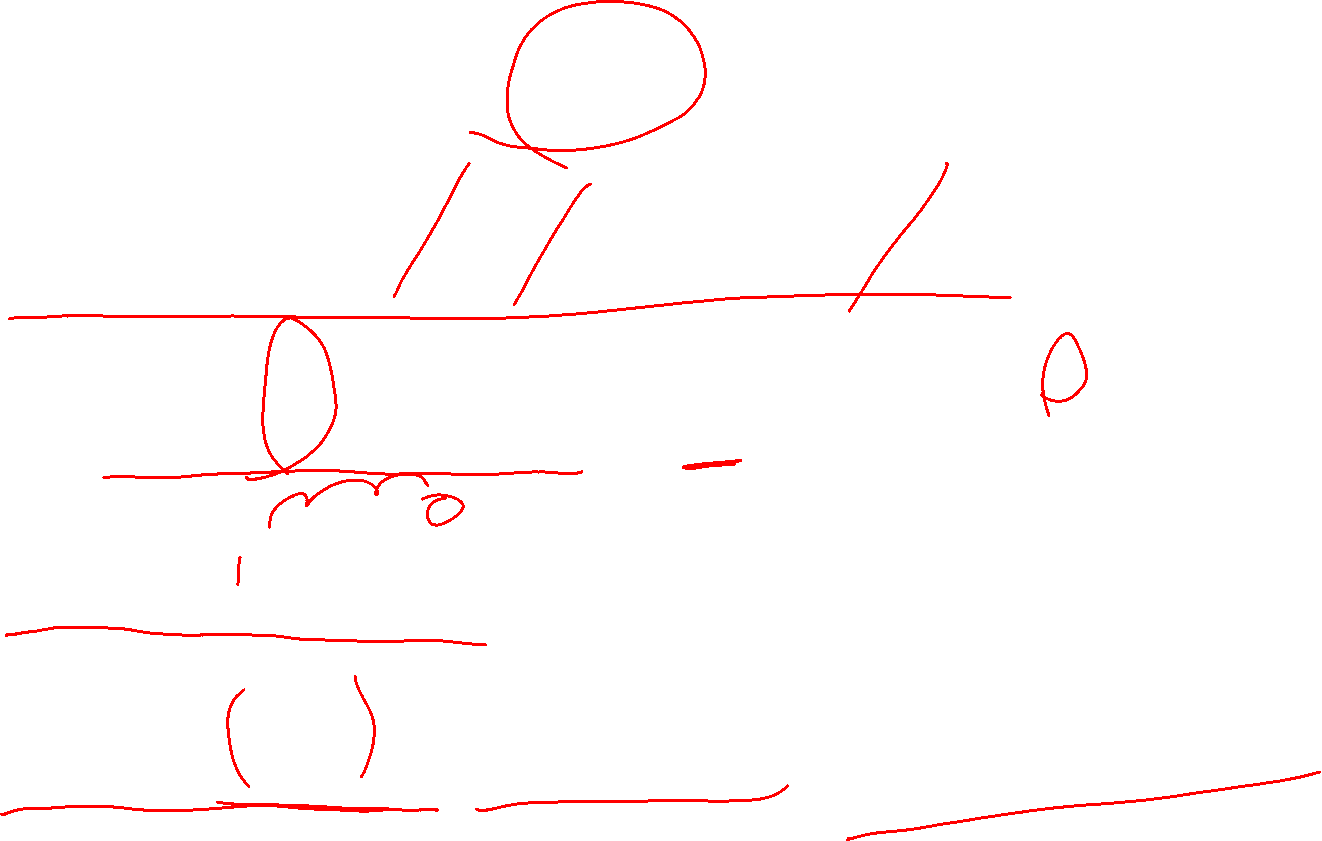
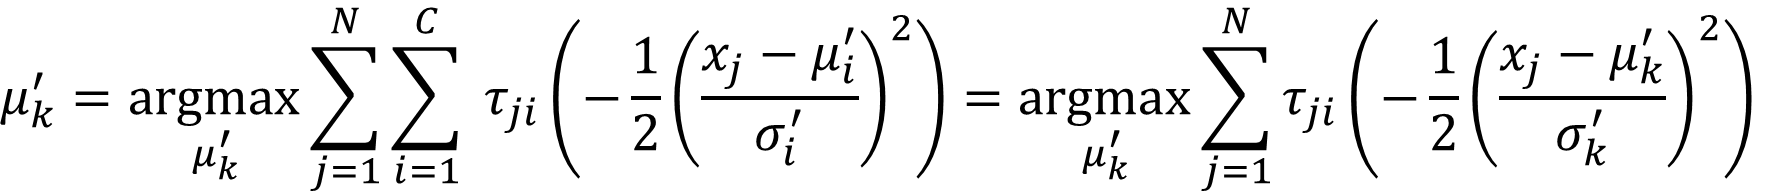
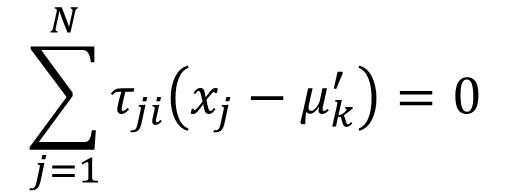
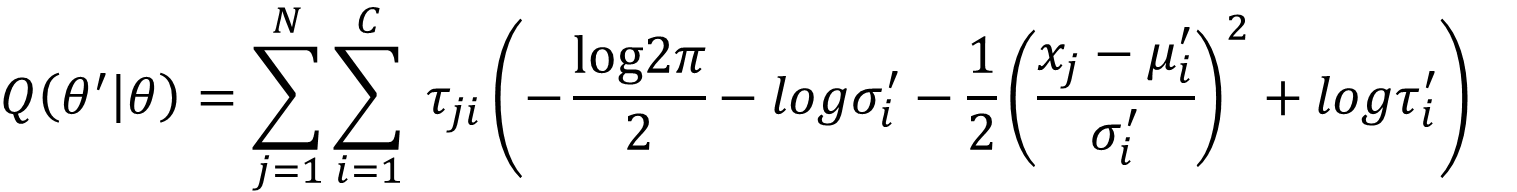
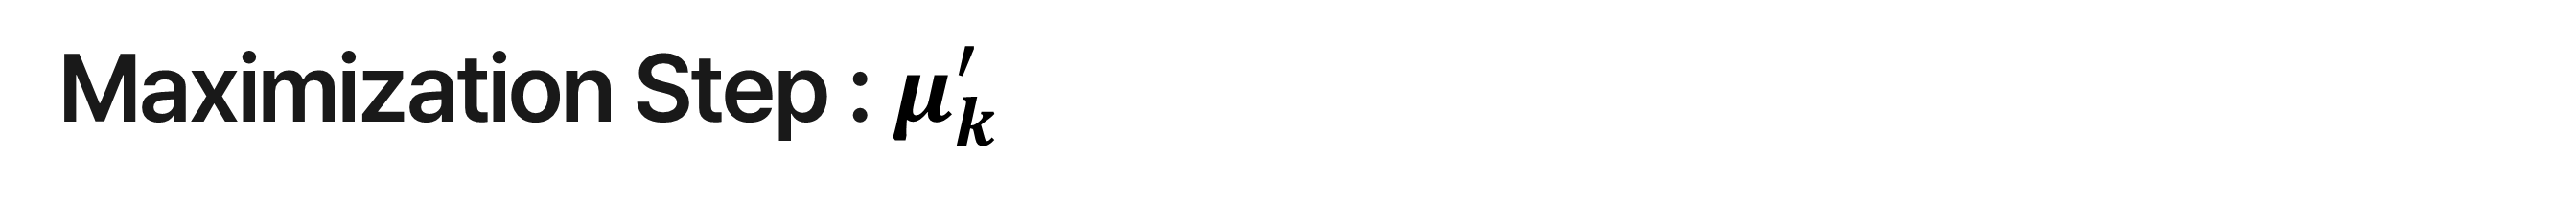
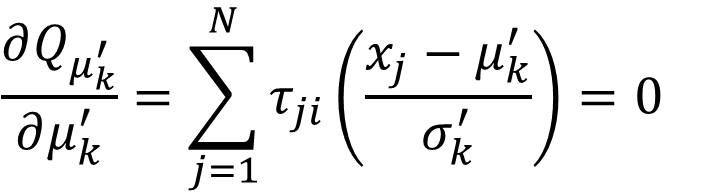


### Slide 10: (Untitled)

- 1
- 기대값 최대화 알고리즘
- Maximization Step:

**Equation 10.1**
$$
𝝈𝒌′
$$

**Equation 10.2**
$$
𝜎𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝑥𝑗−𝜇𝑘′2𝑗=1𝑁𝜏𝑗𝑘
$$

**Equation 10.3**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 10.4**
$$
𝜎𝑘′=argmax𝜎𝑘′𝑗=1𝑁𝑖=1𝐶−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2
$$

**Equation 10.5**
$$
𝑄𝜎𝑘′=𝑗=1𝑁𝜏𝑗𝑖−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑘′𝜎𝑘′2
$$

**Equation 10.6**
$$
𝜕𝑄𝜎𝑘′𝜕𝜎𝑘′=𝑗=1𝑁𝜏𝑗𝑖−1𝜎𝑘′+𝑥𝑗−𝜇𝑘′2𝜎𝑘′3=0
$$

**Equation 10.7**
$$
𝜎𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝑥𝑗−𝜇𝑘′2𝑗=1𝑁𝜏𝑗𝑘
$$

**Equation 10.8**
$$
𝑄𝜃′𝜃=𝑗=1𝑁𝑖=1𝐶 𝜏𝑗𝑖−log2𝜋2−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2+𝑙𝑜𝑔𝜏𝑖′
$$

**Equation 10.9**
$$
𝜎𝑘′=argmax𝜎𝑘′𝑗=1𝑁𝑖=1𝐶−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑖′𝜎𝑖′2
$$

**Equation 10.10**
$$
𝑄𝜎𝑘′=𝑗=1𝑁𝜏𝑗𝑖−𝑙𝑜𝑔𝜎𝑖′−12𝑥𝑗−𝜇𝑘′𝜎𝑘′2
$$

**Equation 10.11**
$$
𝜕𝑄𝜎𝑘′𝜕𝜎𝑘′=𝑗=1𝑁𝜏𝑗𝑖−1𝜎𝑘′+𝑥𝑗−𝜇𝑘′2𝜎𝑘′3=0
$$

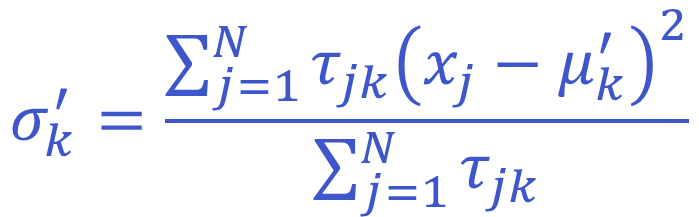
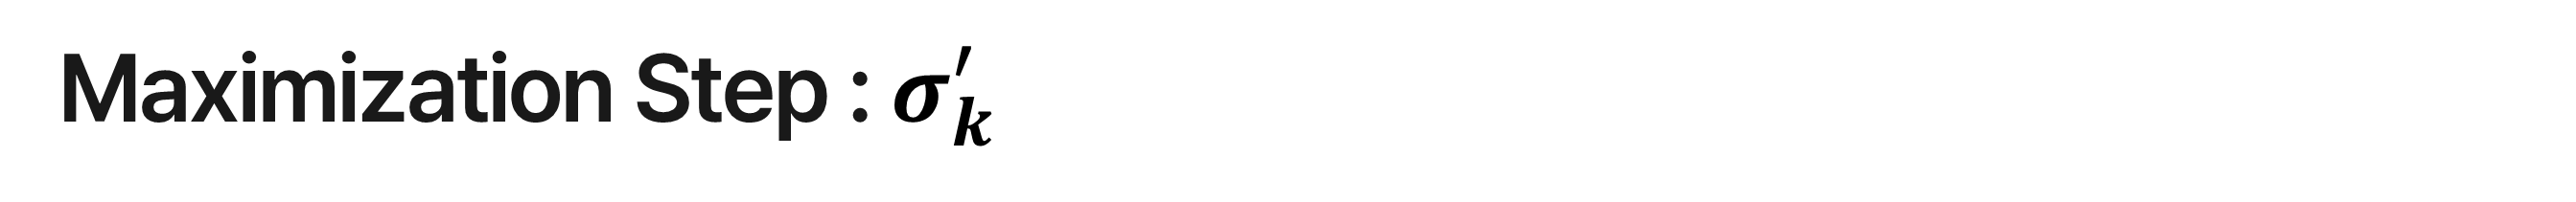
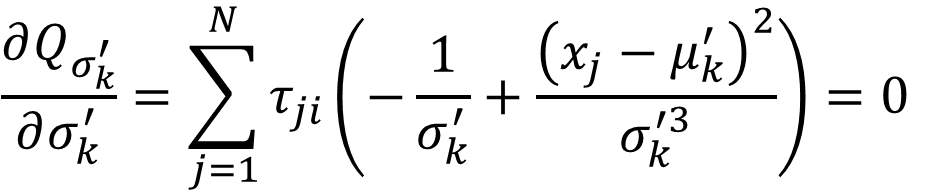
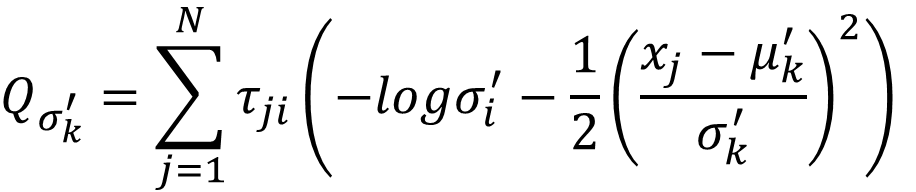
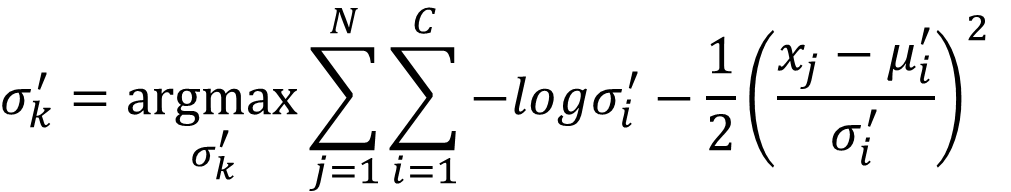
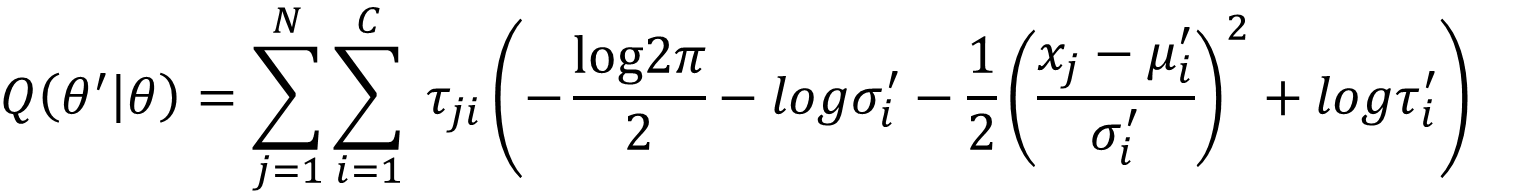
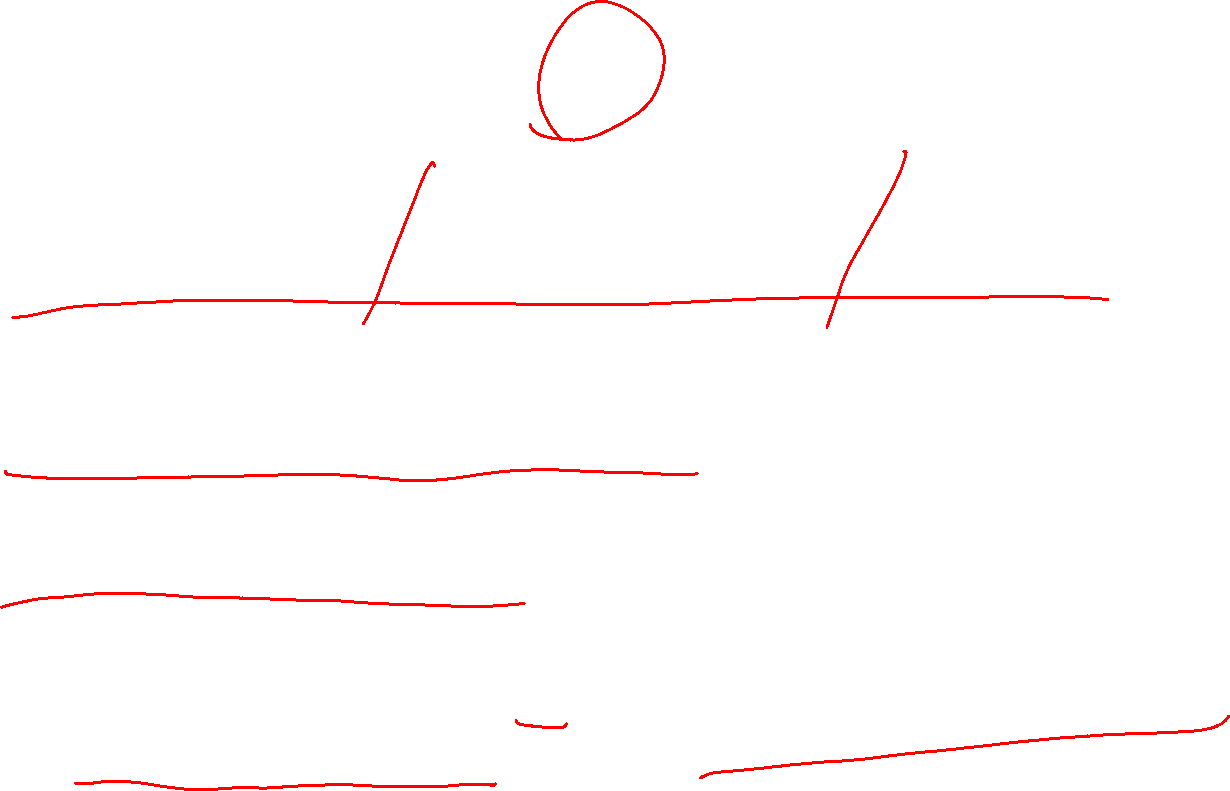


### Slide 11: (Untitled)

- 1
- 알고리즘 수행
- 2. 로 𝜃′계산
- 3. 를 𝜃′로 업데이트
- 4. 종료 조건을 만족할 때까지, 2 부터 반복
- 기대값 최대화 알고리즘
- 1. 모수(θ) 초기화
- 초기화

**Equation 11.1**
$$
𝑿, 𝜃
$$

**Equation 11.2**
$$
𝜃
$$

**Equation 11.3**
$$
𝜏=𝜏′,𝜇=𝜇′,𝜎=𝜎′
$$

**Equation 11.4**
$$
𝜏,𝜇,𝜎
$$

**Equation 11.5**
$$
𝜏𝑗𝑖=12𝜋𝜎𝑖2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑖𝜎𝑖2𝜏𝑖𝑘=1𝐶12𝜋𝜎𝑘2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑘𝜎𝑘2𝜏𝑘
$$

**Equation 11.6**
$$
𝜏𝑘′=1𝑛𝑗=1𝑁𝜏𝑗𝑘
$$

**Equation 11.7**
$$
𝜇𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝑥𝑗𝑗=1𝑁𝜏𝑗𝑘
$$

**Equation 11.8**
$$
𝜎𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝑥𝑗−𝜇𝑘′2𝑗=1𝑁𝜏𝑗𝑘
$$

**Equation 11.9**
$$
𝜏=𝜏′,𝜇=𝜇′,𝜎=𝜎′
$$

**Equation 11.10**
$$
𝜏𝑗𝑖=12𝜋𝜎𝑖2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑖𝜎𝑖2𝜏𝑖𝑘=1𝐶12𝜋𝜎𝑘2𝑒𝑥𝑝−12𝑥𝑗−𝜇𝑘𝜎𝑘2𝜏𝑘
$$

**Equation 11.11**
$$
𝜎𝑘′=𝑗=1𝑁𝜏𝑗𝑘𝑥𝑗−𝜇𝑘′2𝑗=1𝑁𝜏𝑗𝑘
$$

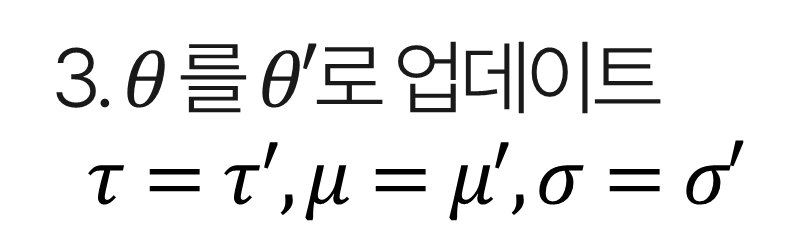
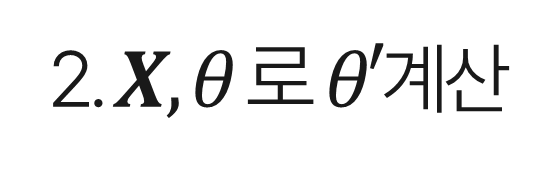
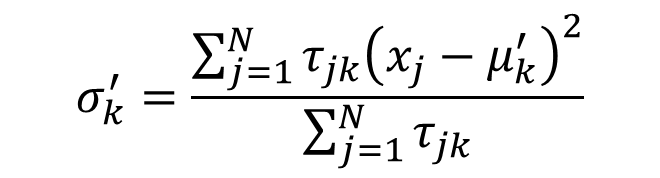
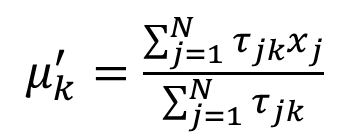
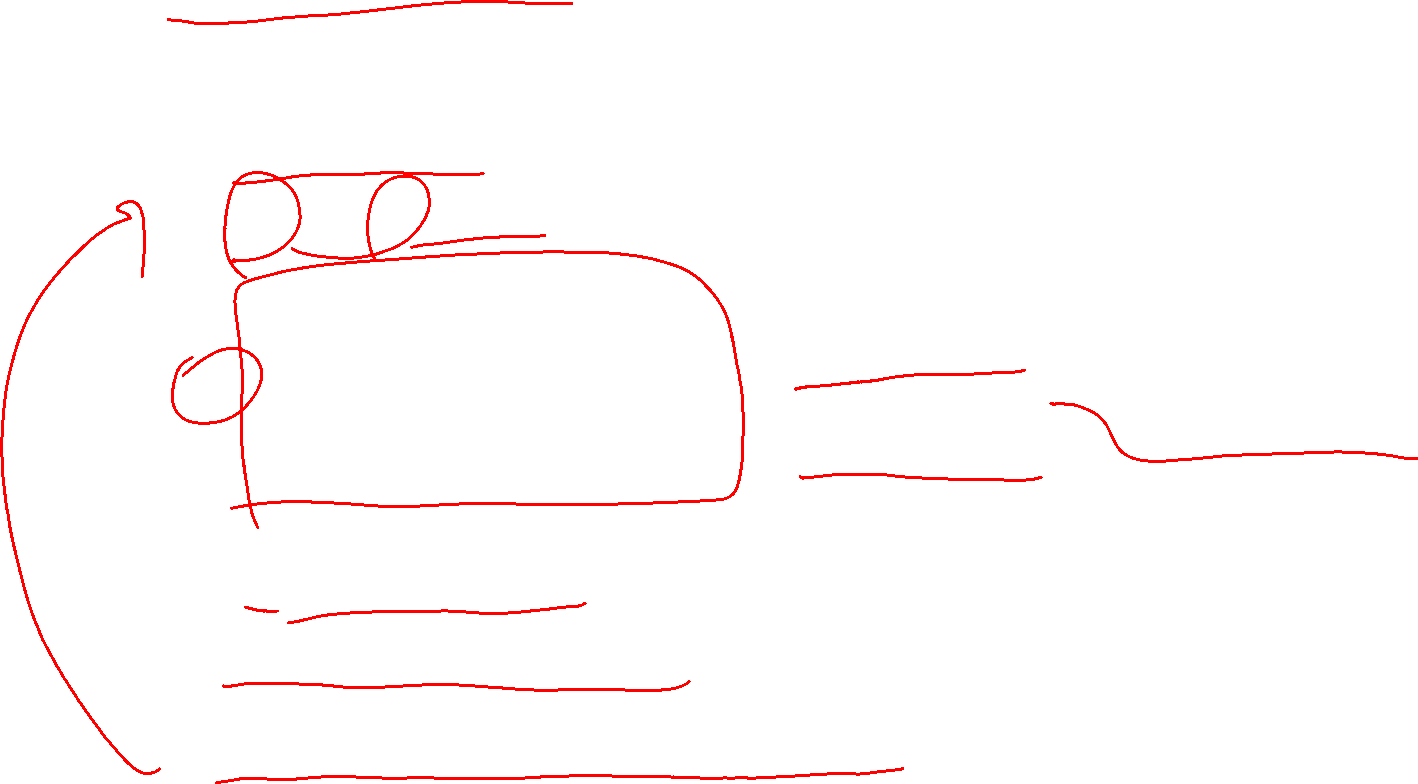
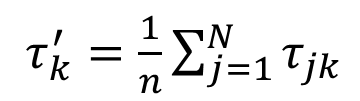
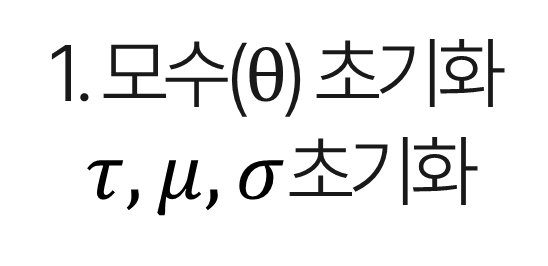
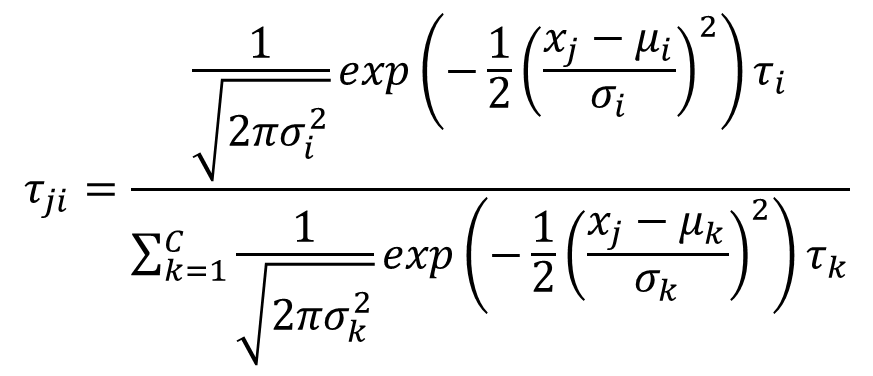


### Slide 12: (Untitled)

- 마르코프 체인 몬테카를로(MCMC) 추정
- 마르코프 체인 몬테카를로 추정
- (Markov Chain Monte-Carlo Estimation, MCMC)
- 확률적 시뮬레이션 방법을 통한 추정 방법
- 마르코프 체인(Markov Chain) + 몬테카를로 방법(Monte Carlo Method)
- 2
- 출처: https://en.wikipedia.org/wiki/Markov_chain, https://en.wikipedia.org/wiki/Monte_Carlo_method

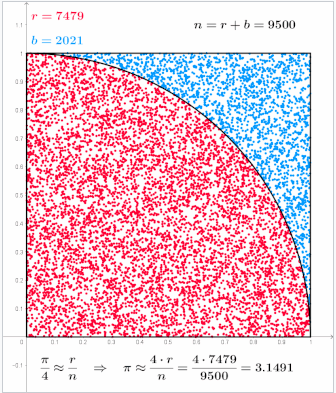
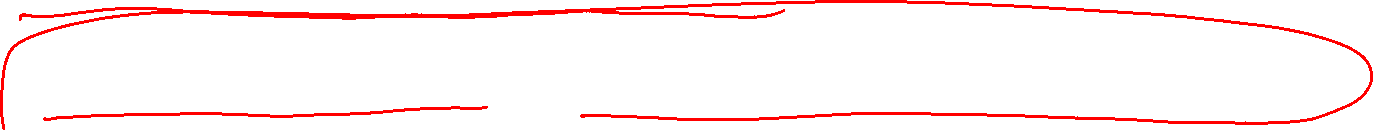
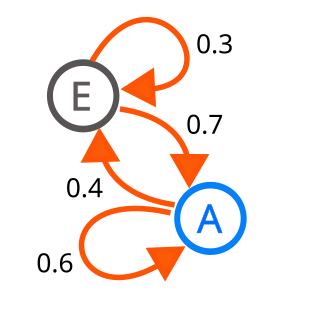
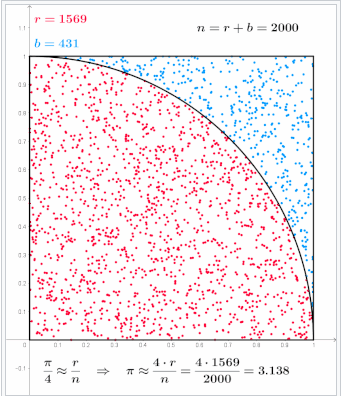


### Slide 13: (Untitled)

- 몬테카를로 방법
- 확률적으로 샘플을 생성하여 전체 분포나 값의 특성을 추정
- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 기본 절차
- 1. 문제를 확률적으로 모델링
- 2. 시뮬레이션
- 2-1. 정의한 확률에 따른 표본 추출
- 2-2. 추출한 변수로 추정
- 2-3. 충분한 표본 수가 확보될 때까지 2-1 부터 반복
- 예)

**Equation 13.1**
$$
𝑎𝑏𝑓𝑥𝑑𝑥≈𝑏−𝑎𝑖−1𝑁𝑓𝑥𝑖𝑁 𝑥𝑖~𝑈𝑛𝑖𝑓𝑜𝑟𝑚(𝑎,𝑏)
$$

**Equation 13.2**
$$
𝑎𝑏𝑓𝑥𝑑𝑥≈𝑏−𝑎𝑖−1𝑁𝑓𝑥𝑖𝑁 𝑥𝑖~𝑈𝑛𝑖𝑓𝑜𝑟𝑚(𝑎,𝑏)
$$

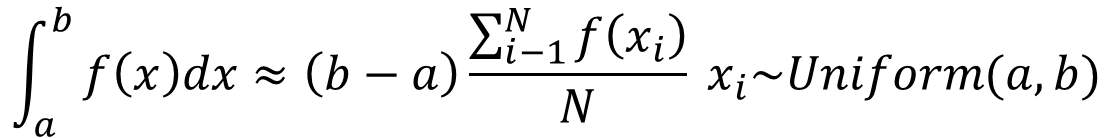
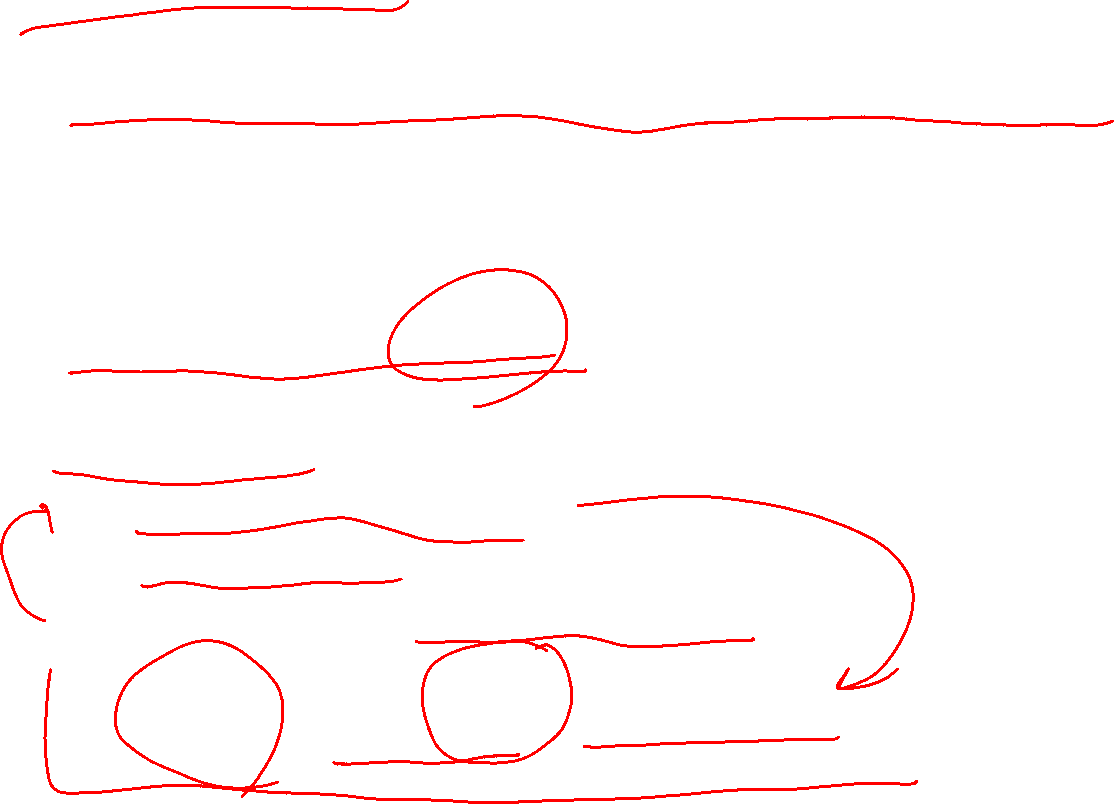


### Slide 14: (Untitled)

- 순차적으로 변하는 상태를 나타내는 확률 모델
- 마르코프 체인
- 날씨 예측
- 맑음, 흐림, 비
- 고객 행동
- 방문, 장바구니, 구매
- 문장 생성
- 단어 1, 단어 2, 단어 3
- 신용 등급
- AAA, AA, A, BBB, BB, default
- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 상태 공간(State Space): 가능한 상태들의 집합

**Table 14.1**
| 날씨 예측 | 맑음, 흐림, 비 |
| --- | --- |
| 고객 행동 | 방문, 장바구니, 구매 |
| 문장 생성 | 단어 1, 단어 2, 단어 3 |
| 신용 등급 | AAA, AA, A, BBB, BB, default |

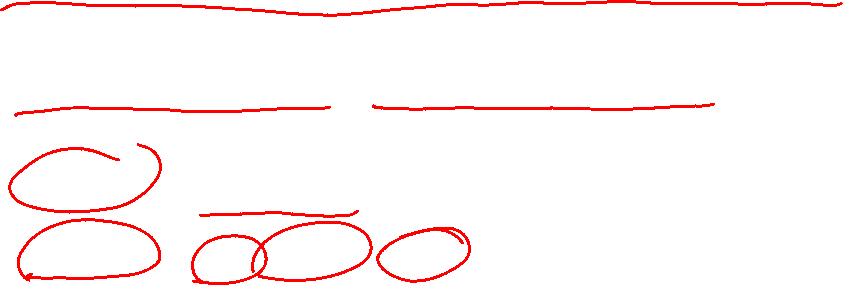


### Slide 15: (Untitled)

- 마르코프 체인
- 과거 독립성: 현재 상태는 오직 직전의 상태에만 의존
- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- sun
- rain
- cloudy
- cloudy
- rain
- sun
- 전이 확률: 상태 i 에서 상태 j 로 이동할 확률
- 전이 행렬: 상태별 전이 확률을 모은 행렬

**Equation 15.1**
$$
𝑝𝑖𝑗=𝑃(𝑋𝑡+1=𝑗|𝑋𝑡=𝑖)
$$

**Equation 15.2**
$$
𝑃=𝑝11⋯𝑝1𝑛⋮⋱⋮𝑝𝑛1⋯𝑝𝑛𝑛
$$

**Equation 15.3**
$$
𝑃=0.60.10.30.30.40.30.30.50.2
$$

**Equation 15.4**
$$
𝑃(𝑋𝑡+1=𝑥𝑡+1|𝑋𝑡=𝑥𝑡,𝑋𝑡−1=𝑥𝑡−1,…,𝑋0=𝑥0)=𝑃(𝑋𝑡+1=𝑗|𝑋𝑡=𝑖)
$$

**Equation 15.5**
$$
𝑝𝑖𝑗=𝑃(𝑋𝑡+1=𝑗|𝑋𝑡=𝑖)
$$

**Equation 15.6**
$$
𝑃=𝑝11⋯𝑝1𝑛⋮⋱⋮𝑝𝑛1⋯𝑝𝑛𝑛
$$

**Equation 15.7**
$$
𝑃=0.60.10.30.30.40.30.30.50.2
$$

**Equation 15.8**
$$
𝑃(𝑋𝑡+1=𝑥𝑡+1|𝑋𝑡=𝑥𝑡,𝑋𝑡−1=𝑥𝑡−1,…,𝑋0=𝑥0)=𝑃(𝑋𝑡+1=𝑗|𝑋𝑡=𝑖)
$$

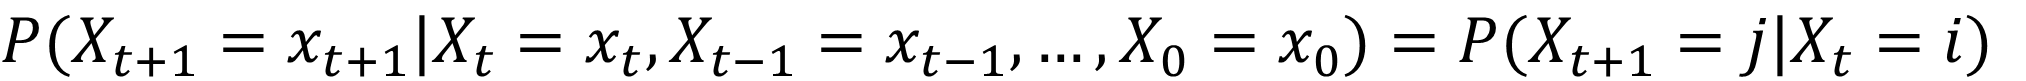
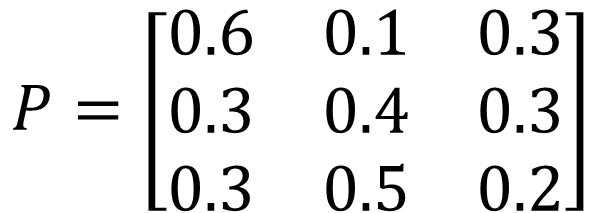
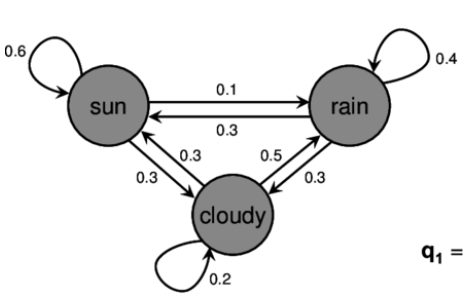
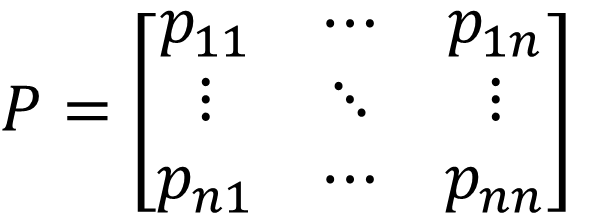
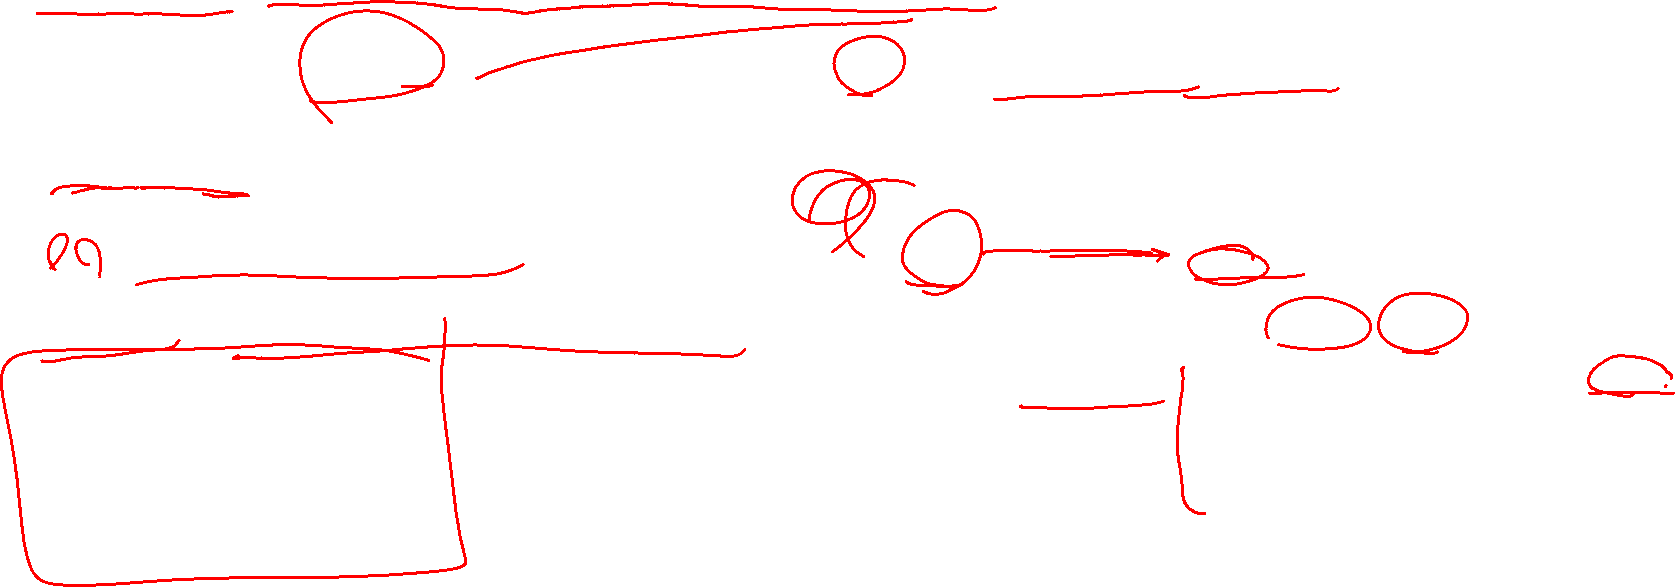
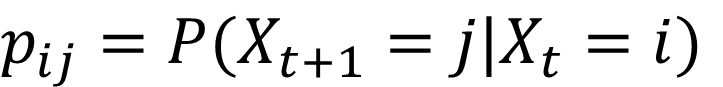


### Slide 16: (Untitled)

- 마르코프 체인
- 상태 확률: t 시점에서 상태의 확률 분포
- 2
- 마르코프 체인 몬테카를로(MCMC) 추정

**Equation 16.1**
$$
𝜋(0)=0.50.30.2
$$

**Equation 16.2**
$$
𝜋(1)=𝜋(0)𝑃
$$

**Equation 16.3**
$$
=0.50.30.20.60.10.30.30.40.30.30.50.2
$$

**Equation 16.4**
$$
=0.450.270.286
$$

**Equation 16.5**
$$
𝑃=0.60.10.30.30.40.30.30.50.2
$$

**Equation 16.6**
$$
𝜋(𝑡)=𝜋1(𝑡)𝜋2(𝑡)…𝜋𝑛(𝑡)
$$

**Equation 16.7**
$$
𝜋(𝑡+1)=𝜋(𝑡)𝑃
$$

**Equation 16.8**
$$
𝜋(0)=0.50.30.2
$$

**Equation 16.9**
$$
𝜋(1)=𝜋(0)𝑃
$$

**Equation 16.10**
$$
=0.50.30.20.60.10.30.30.40.30.30.50.2
$$

**Equation 16.11**
$$
=0.450.270.286
$$

**Equation 16.12**
$$
𝑃=0.60.10.30.30.40.30.30.50.2
$$

**Equation 16.13**
$$
𝜋(𝑡)=𝜋1(𝑡)𝜋2(𝑡)…𝜋𝑛(𝑡)
$$

**Equation 16.14**
$$
𝜋(𝑡+1)=𝜋(𝑡)𝑃
$$

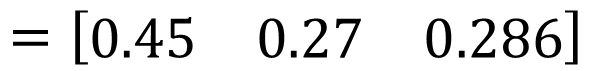
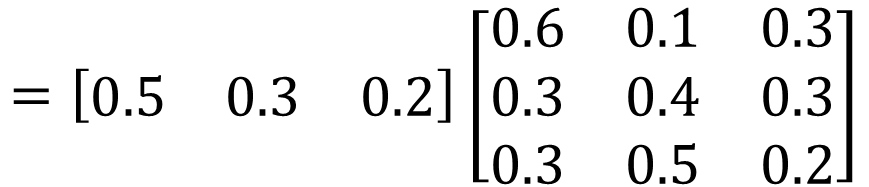
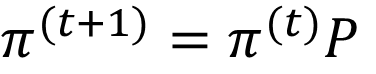
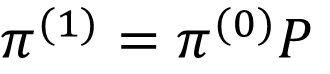
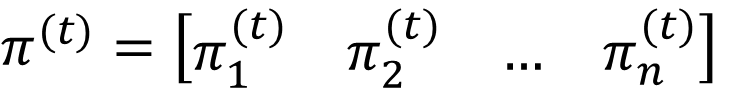
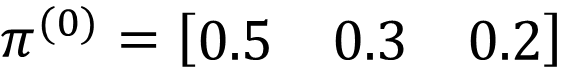
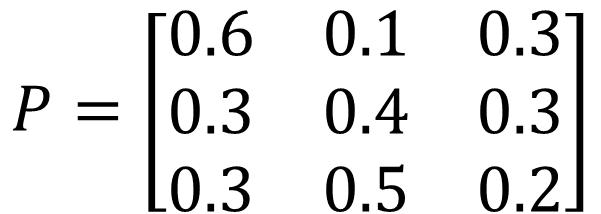
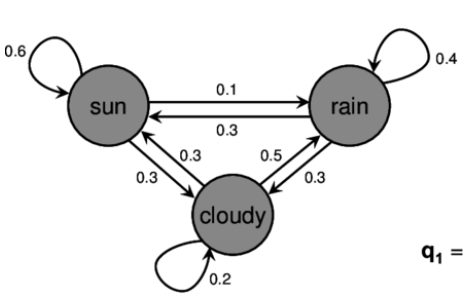
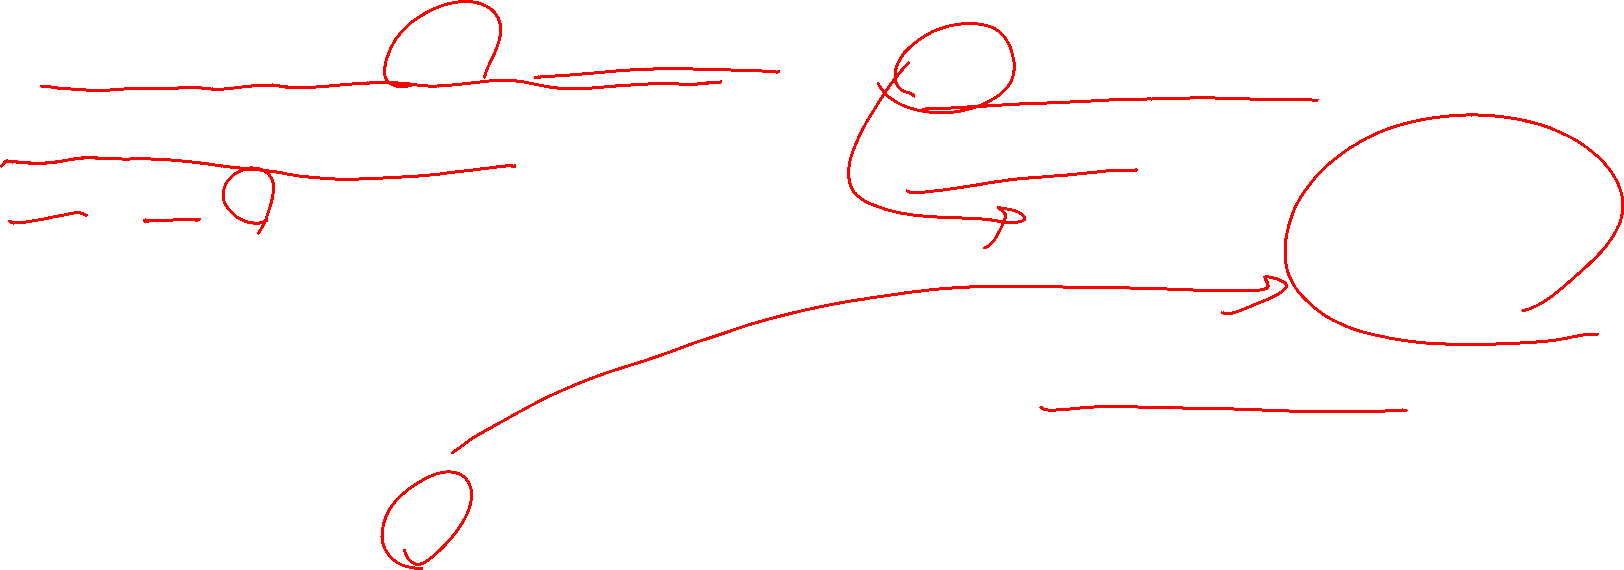


### Slide 17: (Untitled)

- 마르코프 체인
- 정상분포(Stationary Distribution): 마르코프 체인이 수렴했을 때 분포
- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- …

**Equation 17.1**
$$
𝜋(1)=𝜋(0)𝑃
$$

**Equation 17.2**
$$
𝜋(2)=𝜋(1)𝑃
$$

**Equation 17.3**
$$
𝜋=𝜋𝑃
$$

**Equation 17.4**
$$
𝑃=0.60.10.30.30.40.30.30.50.2
$$

**Equation 17.5**
$$
𝜋(1)=𝜋(0)𝑃
$$

**Equation 17.6**
$$
𝜋(2)=𝜋(1)𝑃
$$

**Equation 17.7**
$$
𝜋=𝜋𝑃
$$

**Equation 17.8**
$$
𝑃=0.60.10.30.30.40.30.30.50.2
$$

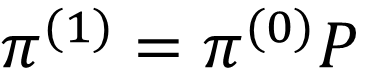
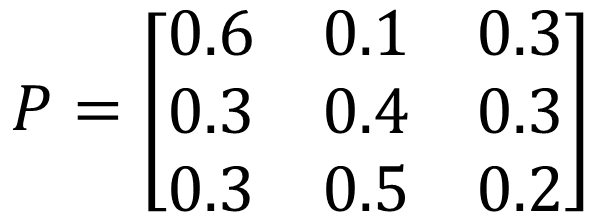
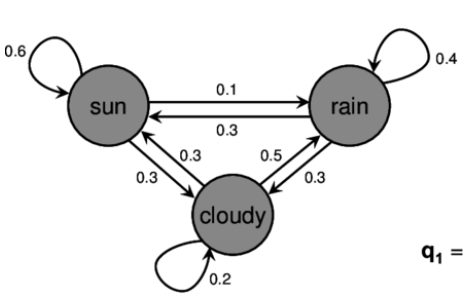
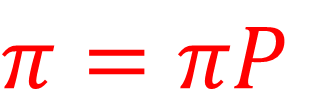
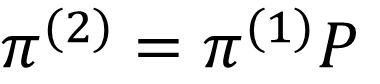
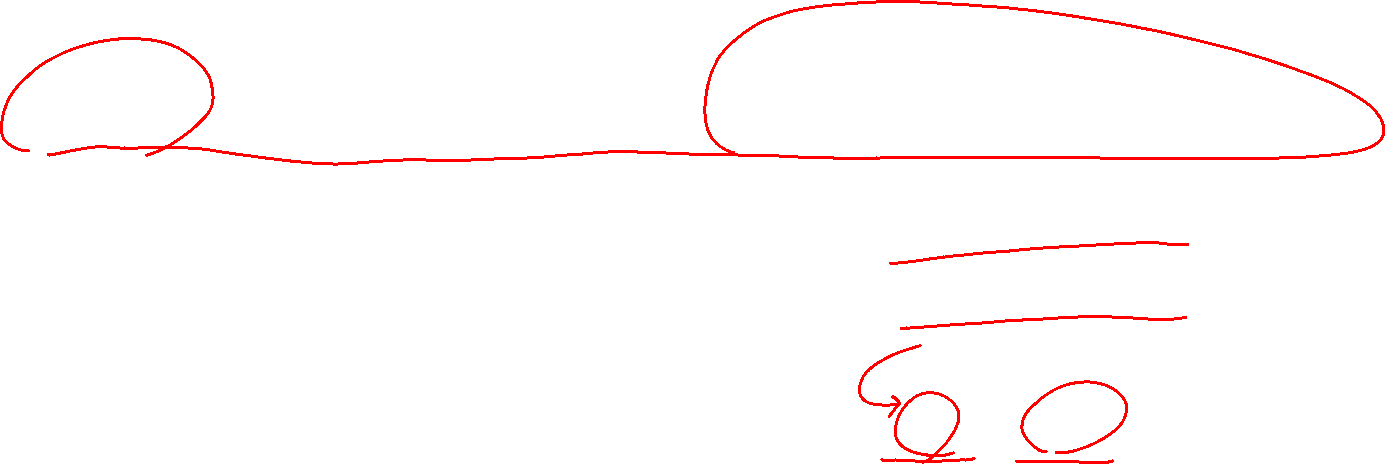


### Slide 18: (Untitled)

- 메트로폴리스-헤이스팅스 알고리즘(Metropolis-Hastings Algorithm)
- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 𝑃(𝑥): 대상 분포(추론하고자 하는 분포)
- 마르코프 과정에서 정상 분포 𝜋(𝑥) 가 𝑃(𝑥) 가 되도록 유도
- 1. 정상 분포의 존재 조건: 상세 균형(detailed balance)
- 2. 정상 분포의 유일성: 에르고딕(ergodic)
- Aperiodic: 비주기성
- Positive recurrent: 유한 단계의 상태 복귀
- 확률분포 𝜋(𝑥)를 직접 구하기 어렵지만, 비례식을 통한 샘플링으로 분포를 근사화
- 이를 위한 두 가지 조건

**Equation 18.1**
$$
𝜋𝑥𝑃𝑥′𝑥=𝜋𝑥′𝑃(𝑥|𝑥′)
$$

**Equation 18.2**
$$
𝜋𝑥𝑃𝑥′𝑥=𝜋𝑥′𝑃(𝑥|𝑥′)
$$

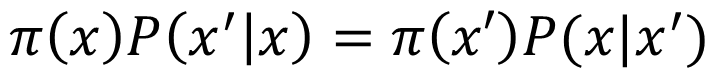
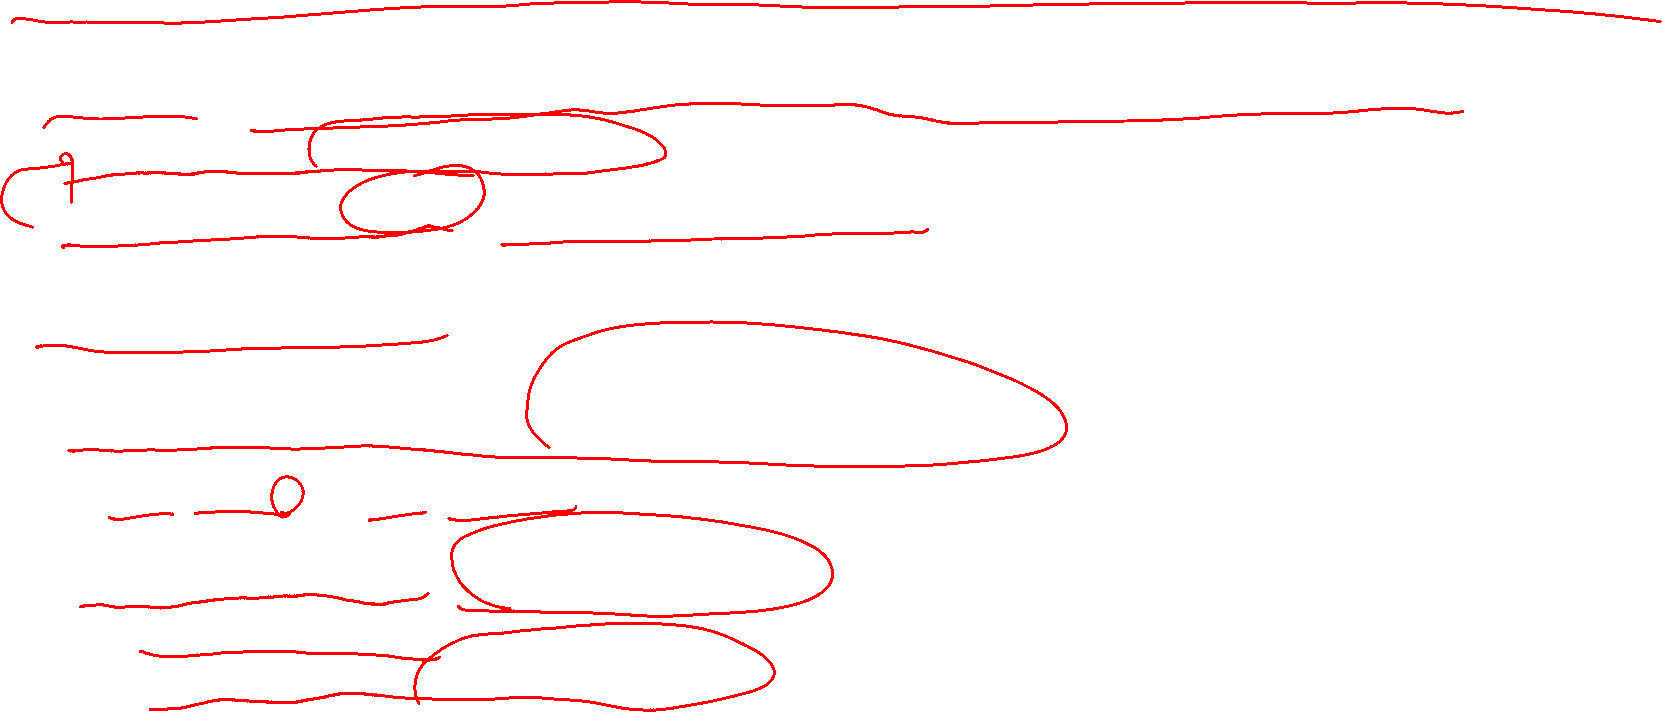


### Slide 19: (Untitled)

- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 전이 확률 를
- 제안 분포(Proposal distribution) 와
- 수락 분포(Acceptance distribution)로 분리
- 에르고딕 성질을 만족시키는
- 메트로폴리스-헤이스팅스 알고리즘(Metropolis-Hastings Algorithm)
- 상세 균형(detailed balance)에서, 𝜋(𝑥)를 𝑃(𝑥)로 설정

**Equation 19.1**
$$
𝑃𝑥′𝑥
$$

**Equation 19.2**
$$
𝑔𝑥′𝑥
$$

**Equation 19.3**
$$
𝐴(𝑥→𝑥′)
$$

**Equation 19.4**
$$
𝐴(𝑥→𝑥′)
$$

**Equation 19.5**
$$
𝑃𝑥𝑃𝑥′𝑥=𝑃𝑥′𝑃(𝑥|𝑥′)
$$

**Equation 19.6**
$$
𝑃𝑥′𝑥𝑃𝑥𝑥′=𝑃𝑥′𝑃𝑥
$$

**Equation 19.7**
$$
𝑃𝑥′𝑥=𝑔𝑥′𝑥𝐴(𝑥→𝑥′)
$$

**Equation 19.8**
$$
𝑔𝑥′𝑥𝐴(𝑥→𝑥′)𝑔𝑥𝑥′𝐴(𝑥′→𝑥)=𝑃𝑥′𝑃𝑥
$$

**Equation 19.9**
$$
𝐴(𝑥→𝑥′)𝐴(𝑥′→𝑥)=𝑃𝑥′𝑔𝑥𝑥′𝑃𝑥𝑔𝑥′𝑥
$$

**Equation 19.10**
$$
𝐴𝑥→𝑥′=min⁡1,𝑃𝑥′𝑔𝑥𝑥′𝑃𝑥𝑔(𝑥′|𝑥)
$$

**Equation 19.11**
$$
𝑃𝑥𝑃𝑥′𝑥=𝑃𝑥′𝑃(𝑥|𝑥′)
$$

**Equation 19.12**
$$
𝑃𝑥′𝑥𝑃𝑥𝑥′=𝑃𝑥′𝑃𝑥
$$

**Equation 19.13**
$$
𝑃𝑥′𝑥=𝑔𝑥′𝑥𝐴(𝑥→𝑥′)
$$

**Equation 19.14**
$$
𝑔𝑥′𝑥𝐴(𝑥→𝑥′)𝑔𝑥𝑥′𝐴(𝑥′→𝑥)=𝑃𝑥′𝑃𝑥
$$

**Equation 19.15**
$$
𝐴(𝑥→𝑥′)𝐴(𝑥′→𝑥)=𝑃𝑥′𝑔𝑥𝑥′𝑃𝑥𝑔𝑥′𝑥
$$

**Equation 19.16**
$$
𝐴𝑥→𝑥′=min⁡1,𝑃𝑥′𝑔𝑥𝑥′𝑃𝑥𝑔(𝑥′|𝑥)
$$

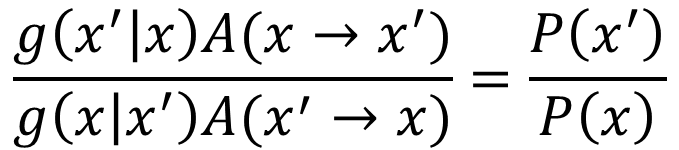
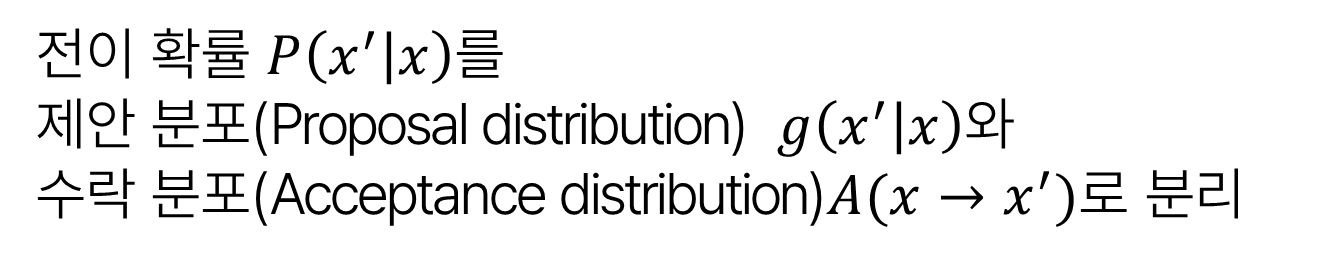
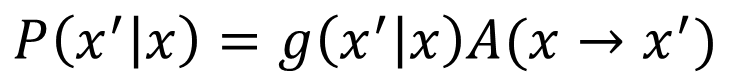
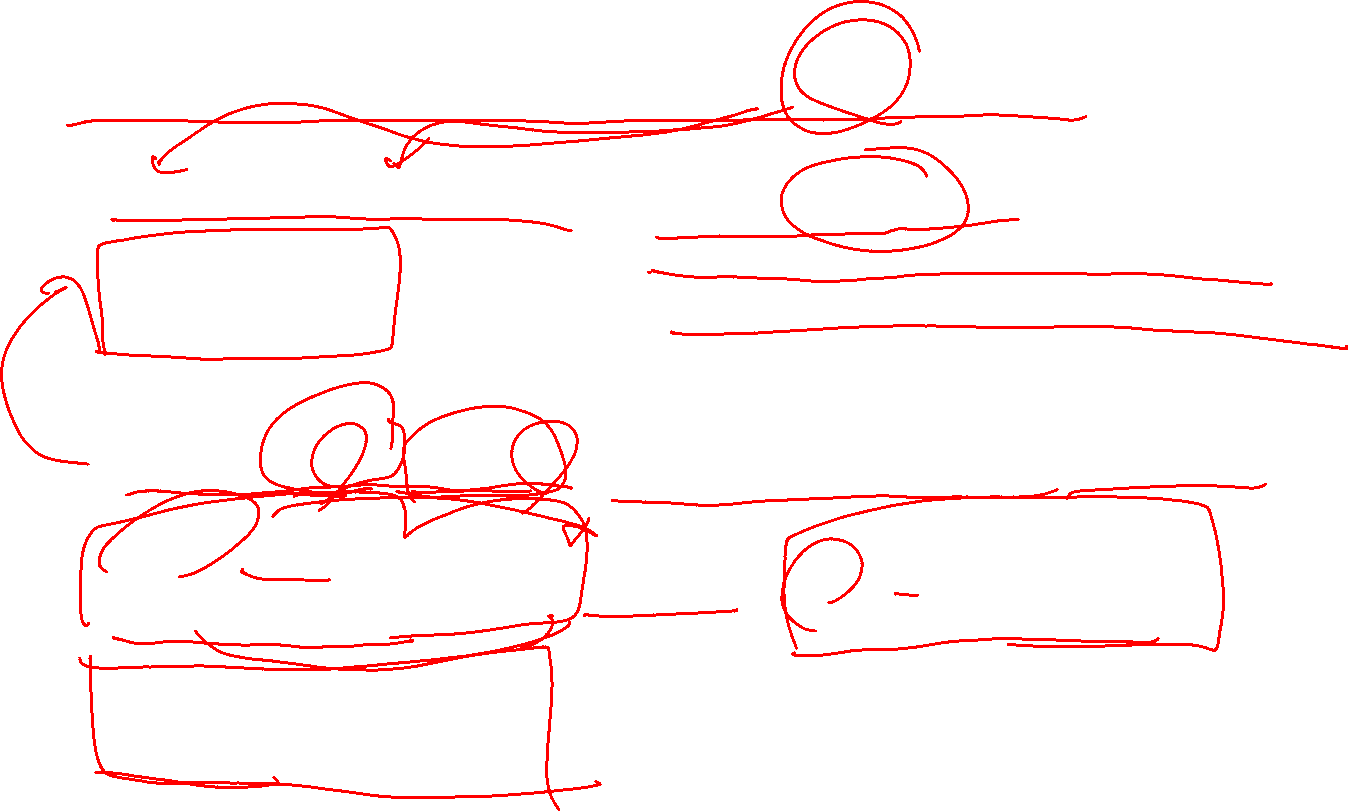
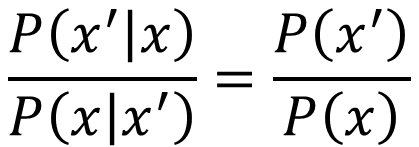
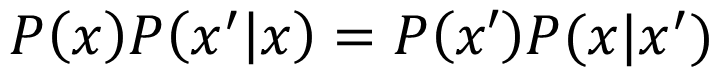
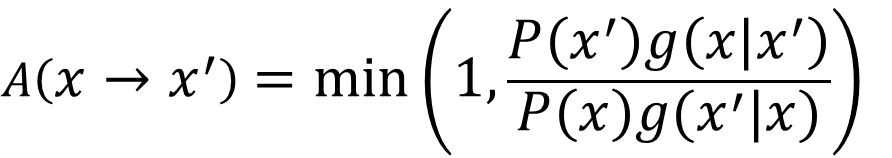
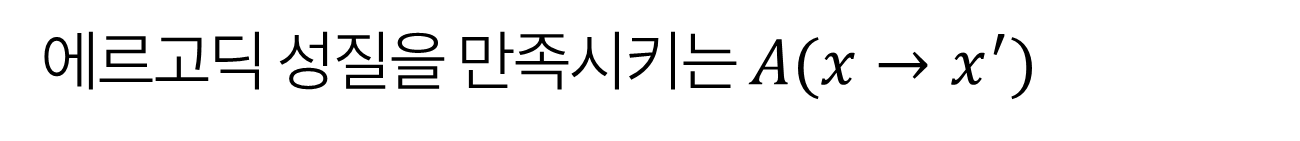
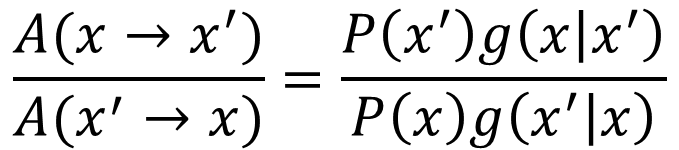


### Slide 20: (Untitled)

- 1. 초기화: t = 0, 초기 설정
- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 2. 반복
- 메트로폴리스-헤이스팅스 알고리즘(Metropolis-Hastings Algorithm)
- 생성
- 계산
- 락(Accept) or 거절(Reject)
- 생성
- ,
- ,

**Equation 20.1**
$$
𝑥0
$$

**Equation 20.2**
$$
𝑥′~𝑔(𝑥′|𝑥𝑡)
$$

**Equation 20.3**
$$
A𝑥′,𝑥𝑡=𝑚𝑖𝑛1,𝑃𝑥′𝑃𝑥𝑡𝑔(𝑥𝑡|𝑥′)𝑔(𝑥′|𝑥𝑡)
$$

**Equation 20.4**
$$
수
$$

**Equation 20.5**
$$
𝑢~𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,1)
$$

**Equation 20.6**
$$
𝑖𝑓 𝑢≤𝐴(𝑥′,𝑥𝑡)
$$

**Equation 20.7**
$$
𝑥𝑡+1=𝑥′
$$

**Equation 20.8**
$$
if 𝑢>𝐴(𝑥′,𝑥𝑡)
$$

**Equation 20.9**
$$
𝑥𝑡+1=𝑥𝑡
$$

**Equation 20.10**
$$
𝑡=𝑡+1
$$

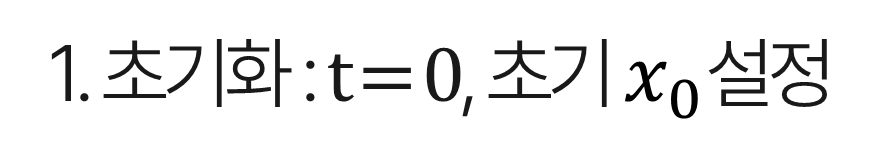
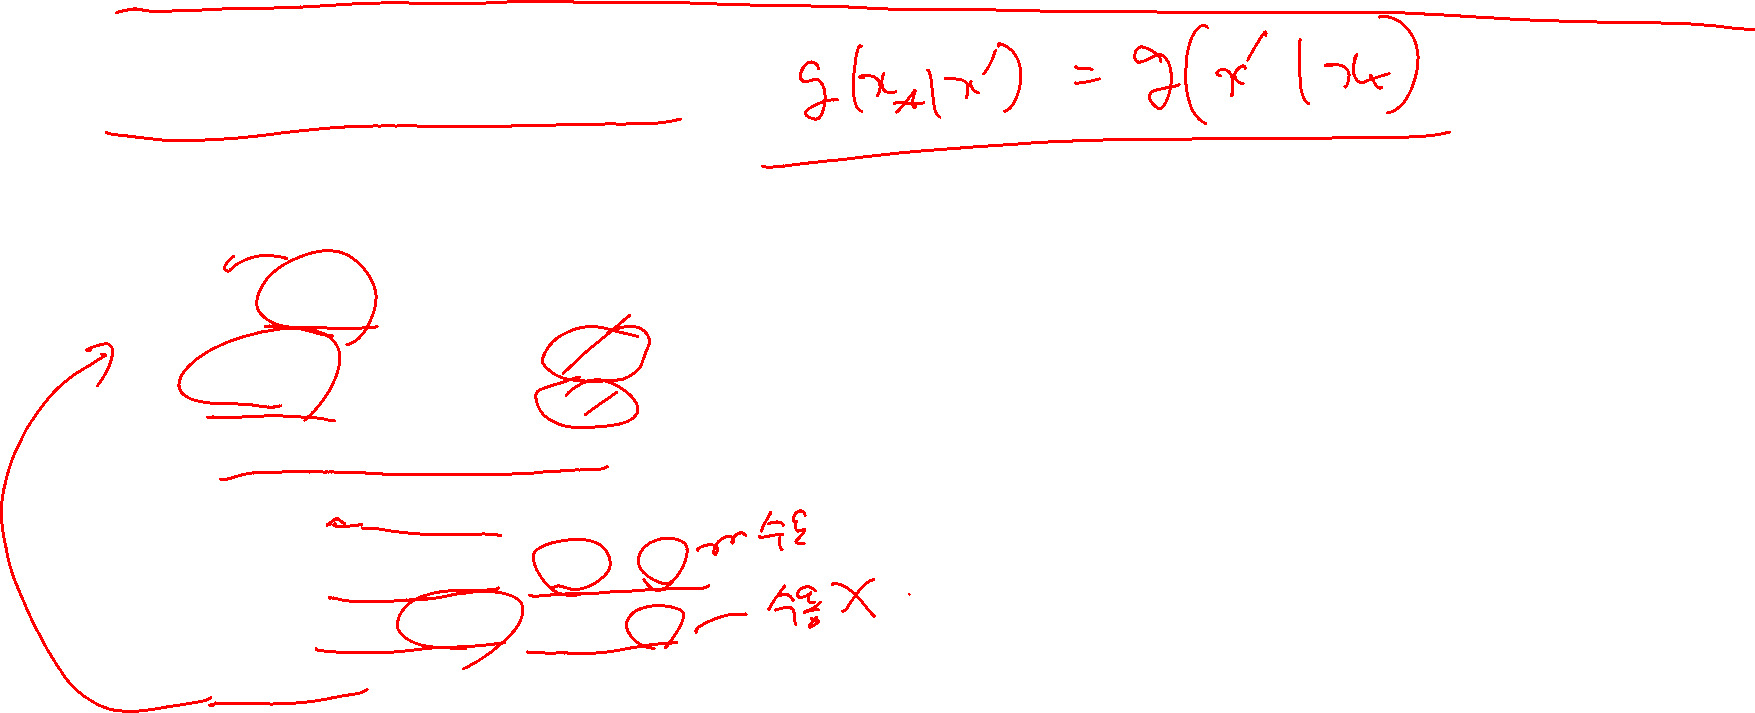
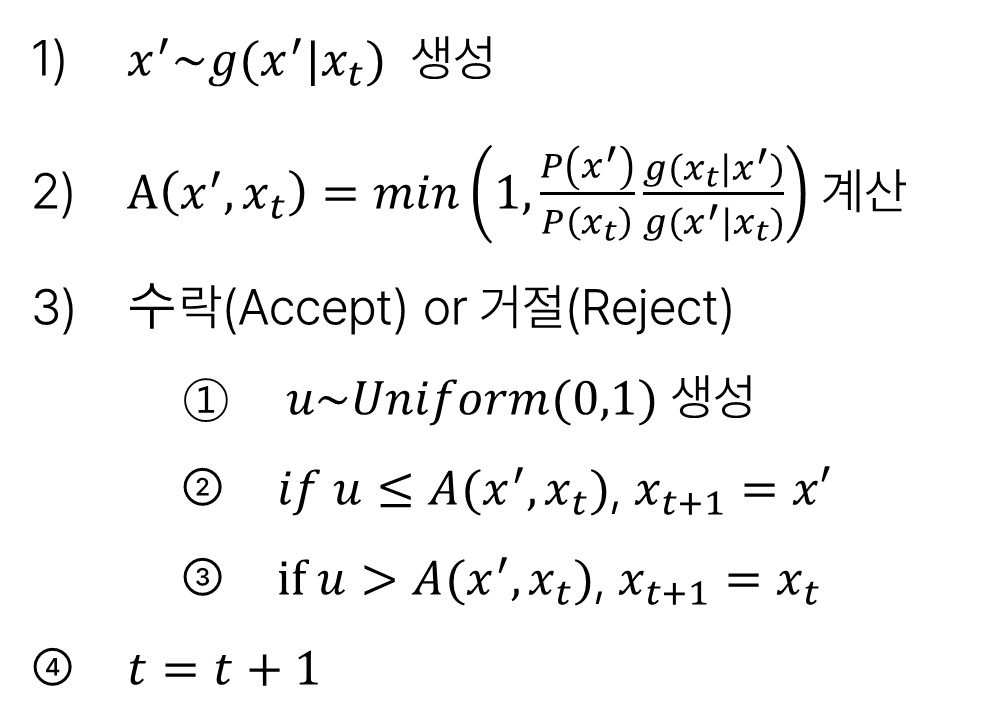


### Slide 21: (Untitled)

- 후처리 과정
- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 1) Burn-in: 정상 분포 수렴 전의 샘플 제거
- 2) Thinning: 샘플 간 의존 제거
- 메트로폴리스-헤이스팅스 알고리즘(Metropolis-Hastings Algorithm)
- 자가 상관도(Autocorrelation) 분석
- ESS 계산: 독립적 샘플 추정
- : 총 샘플 수,: k-lag 의 자기상관 계수

**Equation 21.1**
$$
𝐸𝑆𝑆=𝑁1+2𝑘𝜌𝑘
$$

**Equation 21.2**
$$
𝑁
$$

**Equation 21.3**
$$
𝜌𝑘
$$

**Equation 21.4**
$$
𝐸𝑆𝑆=𝑁1+2𝑘𝜌𝑘
$$

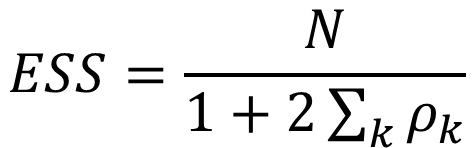
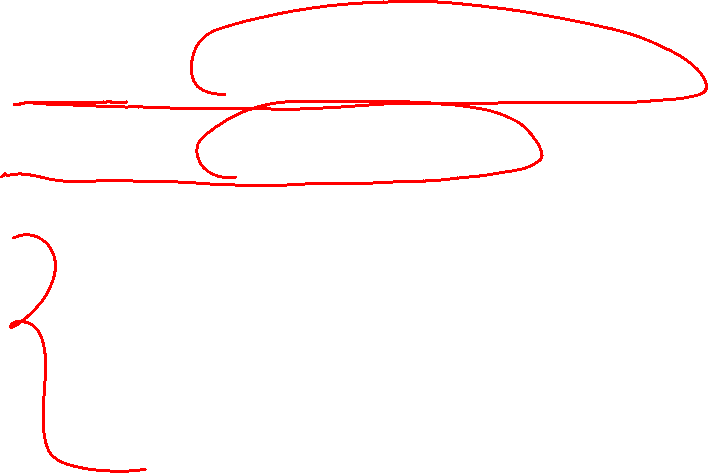
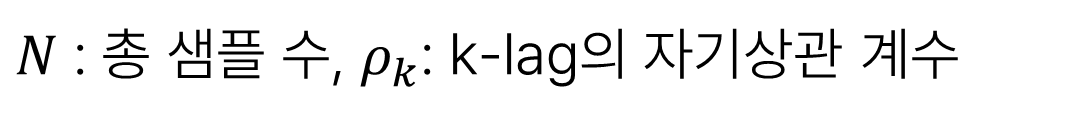


### Slide 22: (Untitled)

- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 메트로폴리스-헤이스팅스 알고리즘(Metropolis-Hastings Algorithm) 예
- 증거(Evidence): 관측치가 발생할 확률
- 사전 정보(𝑃(𝜃), Prior)와 관측 데이터(X)를 결합하여,
- 사전 정보(𝑃(𝜃), Prior)를 사후 정보(𝑃(𝜃│𝑋), Posterior)로 업데이트하는 추론법
- 베이지언 추론(Bayesian inference)

**Equation 22.1**
$$
𝑃𝜃𝑋=𝑃𝑋𝜃⋅𝑃𝜃𝑃(𝑋)
$$

**Equation 22.2**
$$
𝑃𝜃𝑋=𝑃𝑋𝜃⋅𝑃𝜃𝑃(𝑋)
$$

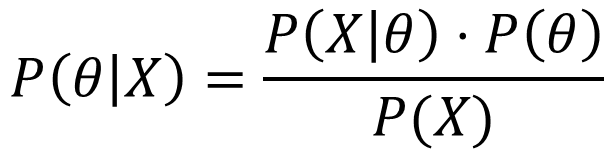
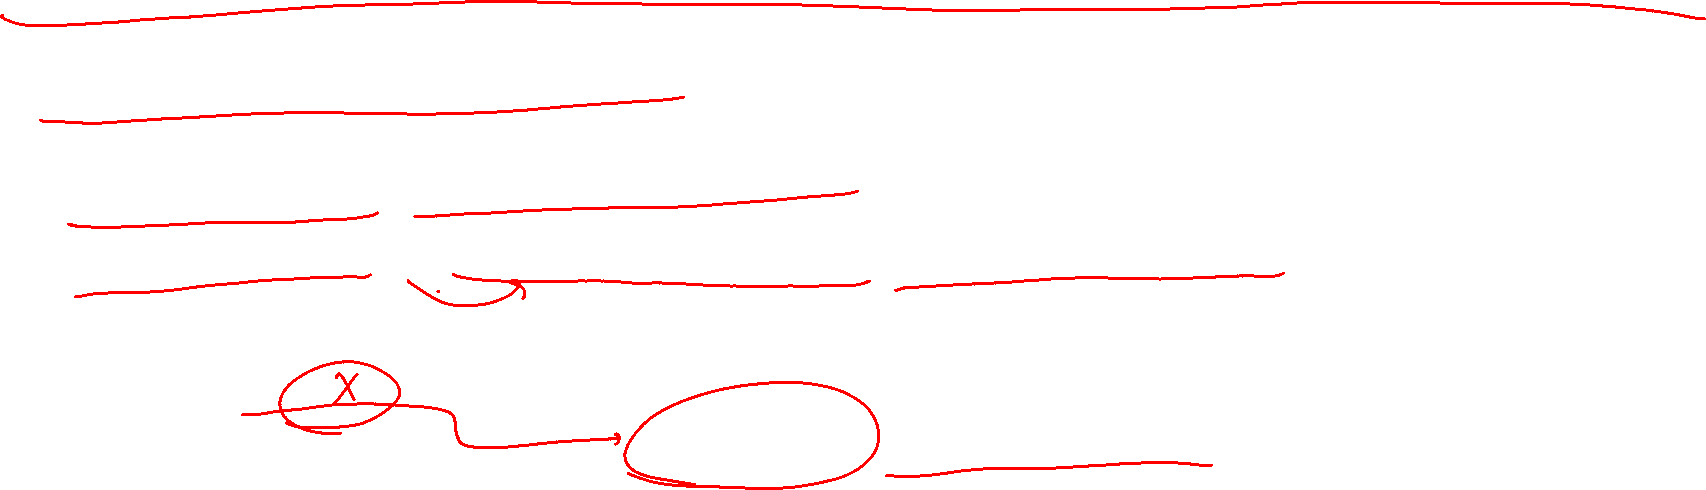


### Slide 23: (Untitled)

- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 실제로 에서 샘플링됨
- 𝐗={11.9, 10.5, 12.1, 14.1, 9.5, 9.5, 14.1, 12.2, 9.9, 12.2,
- 9.2, 9.2, 12.4, 11.7, 8.7, 9.4, 11.5, 12.9, 10.5, 9.1}
- Ex)
- 붓꽃(Iris) 직경의 사후 분포의 모수 추정
- 붓꽃의 사전 분포
- 붓꽃 직경의 관측 표본
- P(X)를 구하는 건 무척 어려움
- M-H 알고리즘으로 실제 P(X) 없이 추정

**Equation 23.1**
$$
𝑵(𝟏𝟏, 𝟐𝟐)
$$

**Equation 23.2**
$$
𝑋~𝑁10,22
$$

**Equation 23.3**
$$
𝑃𝜇𝐗=𝑃𝐗𝜇⋅𝑃𝜇𝑃(𝐗)
$$

**Equation 23.4**
$$
𝜇~𝑁(10,22)
$$

**Equation 23.5**
$$
𝑋|𝜇~𝑁𝜇,22
$$

**Equation 23.6**
$$
𝑃𝜇𝐗=𝑃𝐗𝜇⋅𝑃𝜇𝑃(𝐗)
$$

**Equation 23.7**
$$
𝜇~𝑁(10,22)
$$

**Equation 23.8**
$$
𝑋|𝜇~𝑁𝜇,22
$$

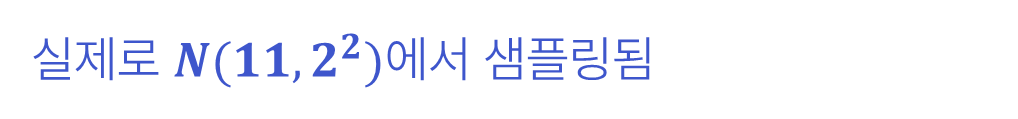
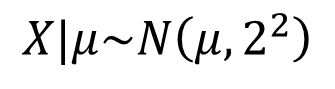
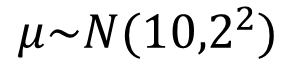
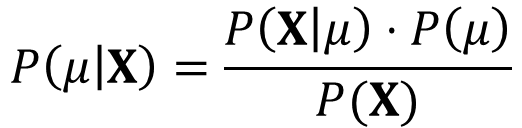
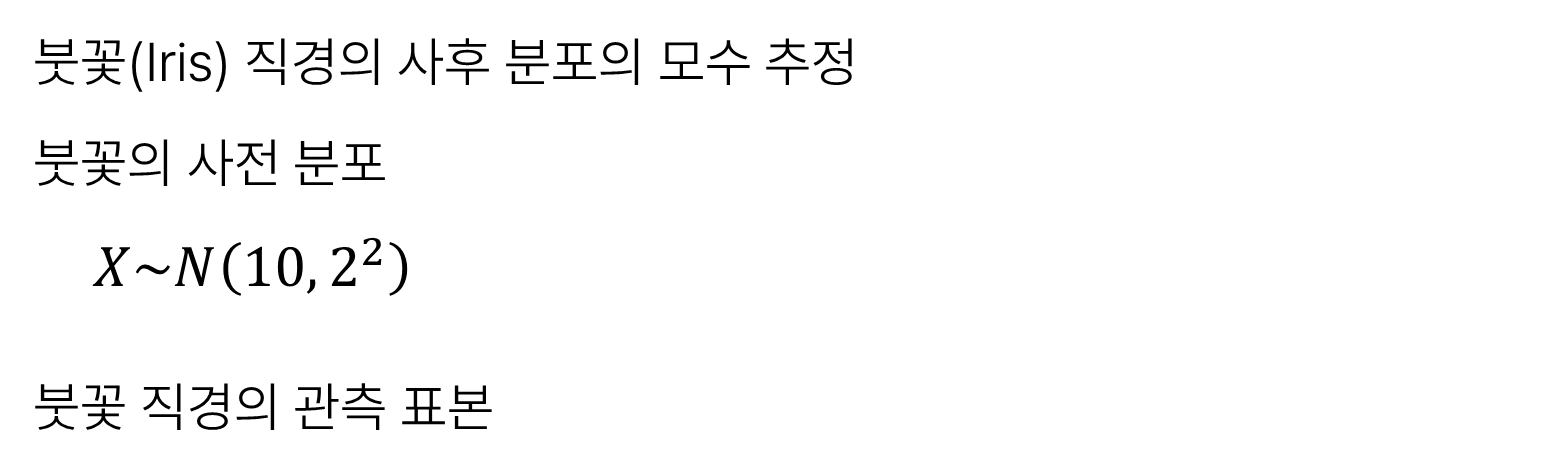
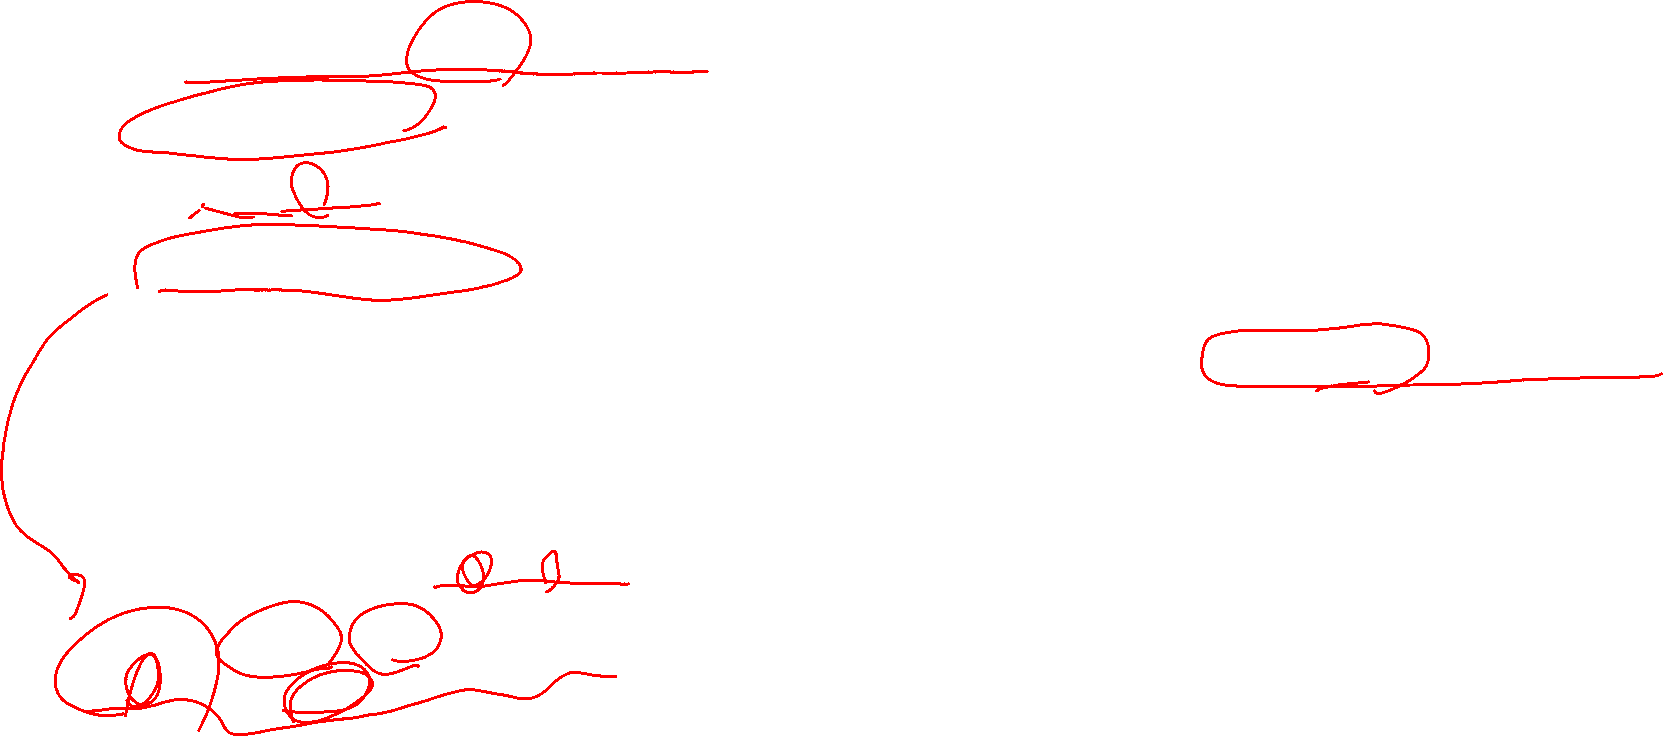


### Slide 24: (Untitled)

- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 제안 분포의 유도
- 제안 분포가 =인 것을 사용
- 가 약분 되어 사라짐

**Equation 24.1**
$$
A𝑥′,𝑥𝑡=𝑚𝑖𝑛1,𝑃𝑥′𝑃𝑥𝑡𝑔(𝑥𝑡|𝑥′)𝑔(𝑥′|𝑥𝑡)
$$

**Equation 24.2**
$$
𝑚𝑖𝑛1,𝑃𝜇′|𝐗𝑃(𝜇𝑡|𝐗)𝑔(𝑥𝑡|𝑥′)𝑔(𝑥′|𝑥𝑡)=𝑚𝑖𝑛1,𝑃𝐗|𝜇′𝑃(𝜇′)𝑃𝐗𝜇𝑡𝑃(𝜇𝑡)𝑔(𝑥𝑡|𝑥′)𝑔(𝑥′|𝑥𝑡)
$$

**Equation 24.3**
$$
𝑔(𝜇𝑡|𝜇′)
$$

**Equation 24.4**
$$
𝑔𝜇′𝜇
$$

**Equation 24.5**
$$
𝑚𝑖𝑛1,𝑃𝐗|𝜇′𝑃(𝜇′)𝑃𝐗𝜇𝑡𝑃(𝜇𝑡)
$$

**Equation 24.6**
$$
𝑃(𝐗)
$$

**Equation 24.7**
$$
𝑃𝜇𝐗=𝑃𝐗𝜇⋅𝑃𝜇𝑃(𝑋)
$$

**Equation 24.8**
$$
𝜇~𝑁(10, 𝜎𝜇2)
$$

**Equation 24.9**
$$
𝑋|𝜇~𝑁𝜇,22
$$

**Equation 24.10**
$$
A𝑥′,𝑥𝑡=𝑚𝑖𝑛1,𝑃𝑥′𝑃𝑥𝑡𝑔(𝑥𝑡|𝑥′)𝑔(𝑥′|𝑥𝑡)
$$

**Equation 24.11**
$$
𝑚𝑖𝑛1,𝑃𝜇′|𝐗𝑃(𝜇𝑡|𝐗)𝑔(𝑥𝑡|𝑥′)𝑔(𝑥′|𝑥𝑡)=𝑚𝑖𝑛1,𝑃𝐗|𝜇′𝑃(𝜇′)𝑃𝐗𝜇𝑡𝑃(𝜇𝑡)𝑔(𝑥𝑡|𝑥′)𝑔(𝑥′|𝑥𝑡)
$$

**Equation 24.12**
$$
𝑚𝑖𝑛1,𝑃𝐗|𝜇′𝑃(𝜇′)𝑃𝐗𝜇𝑡𝑃(𝜇𝑡)
$$

**Equation 24.13**
$$
𝑃𝜇𝐗=𝑃𝐗𝜇⋅𝑃𝜇𝑃(𝑋)
$$

**Equation 24.14**
$$
𝜇~𝑁(10, 𝜎𝜇2)
$$

**Equation 24.15**
$$
𝑋|𝜇~𝑁𝜇,22
$$

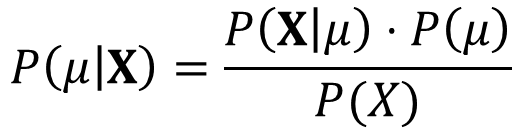
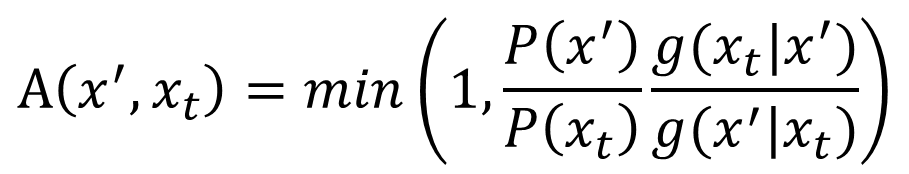
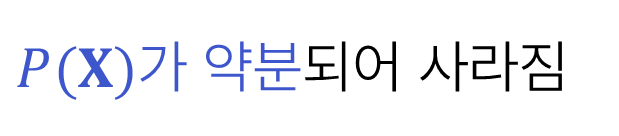
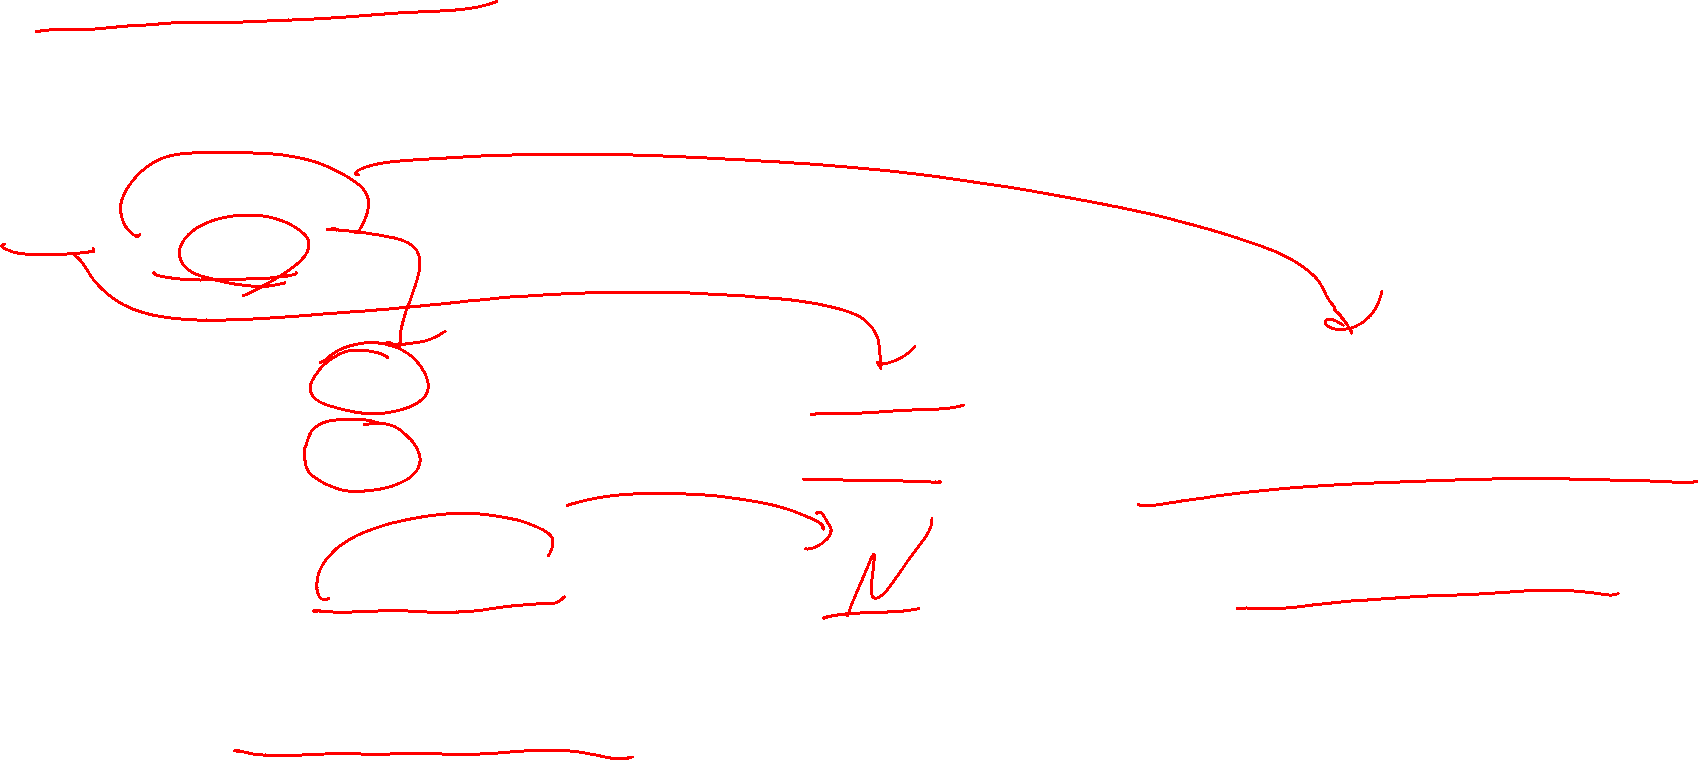
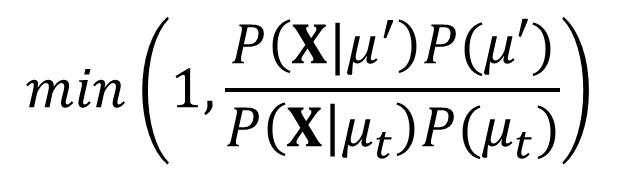
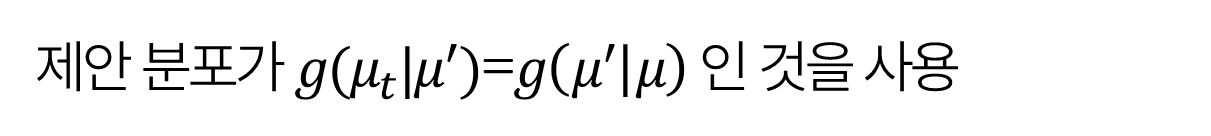
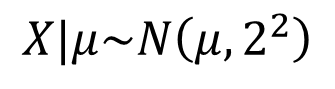
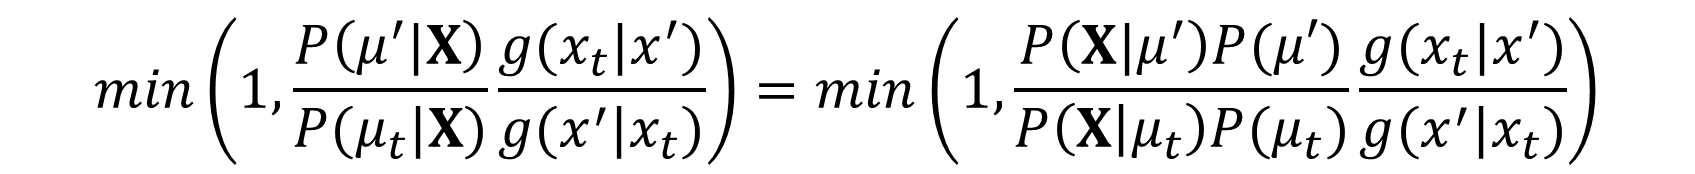
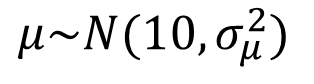


### Slide 25: (Untitled)

- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 실제 분포에 수렴하지 않은 구간
- 샘플링 결과

**Equation 25.1**
$$
𝝁
$$

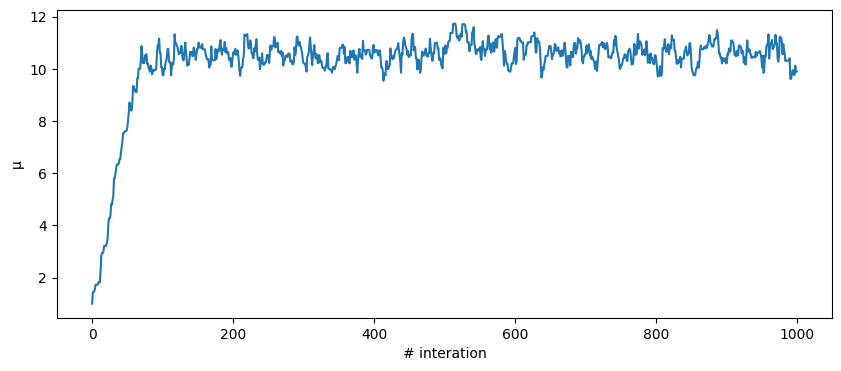
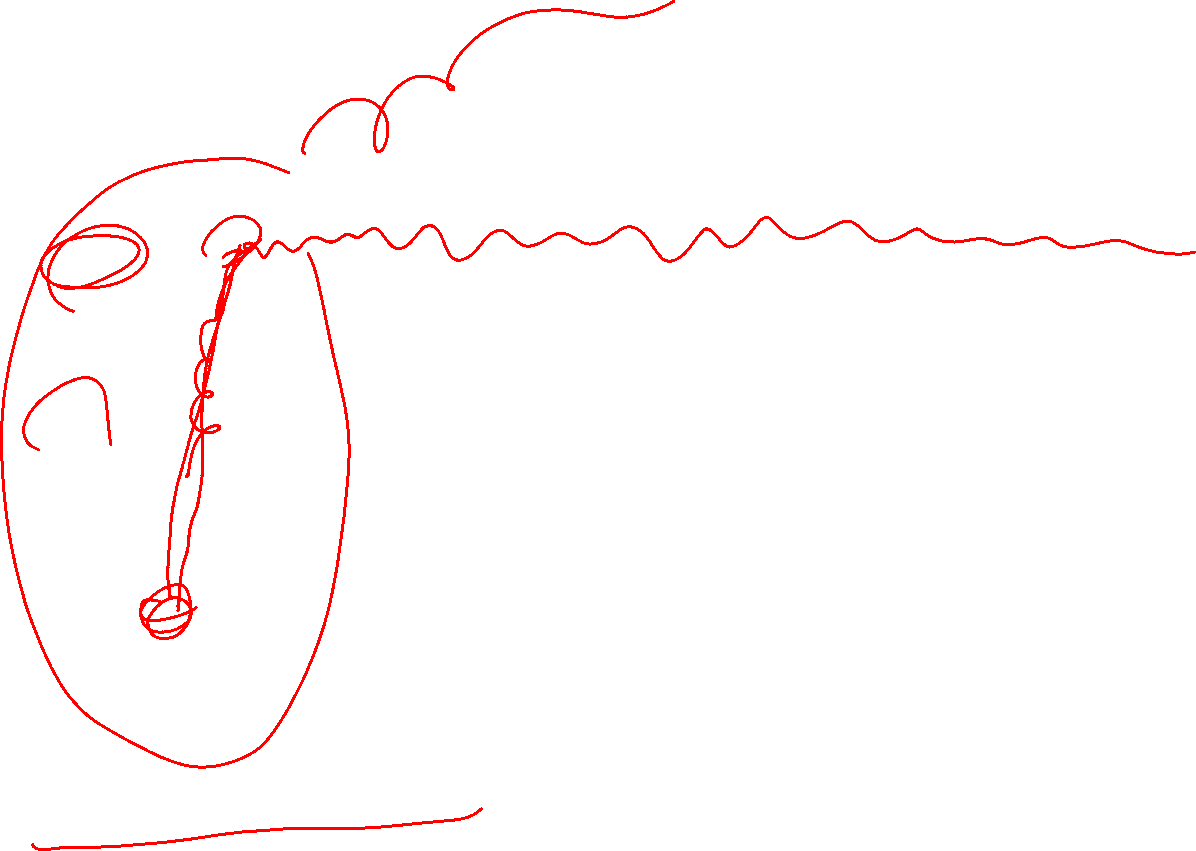
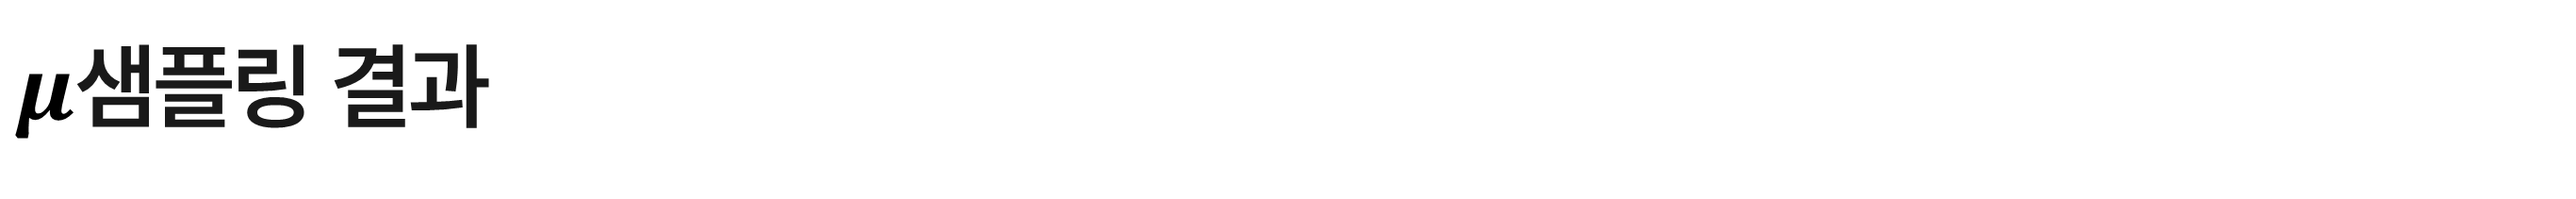


### Slide 26: (Untitled)

- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 샘플링된 의 자기 상관도
- 독립인 표본이 되기까지의 간격

**Equation 26.1**
$$
𝝁
$$

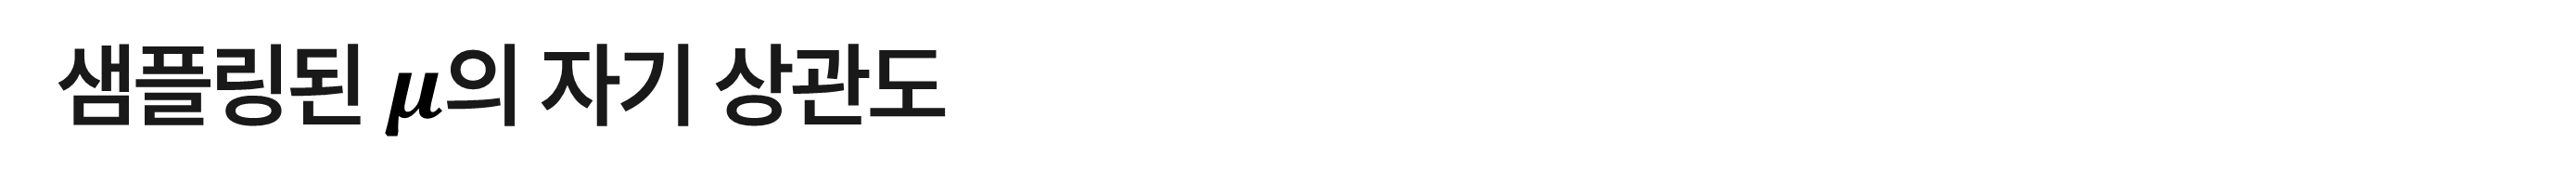
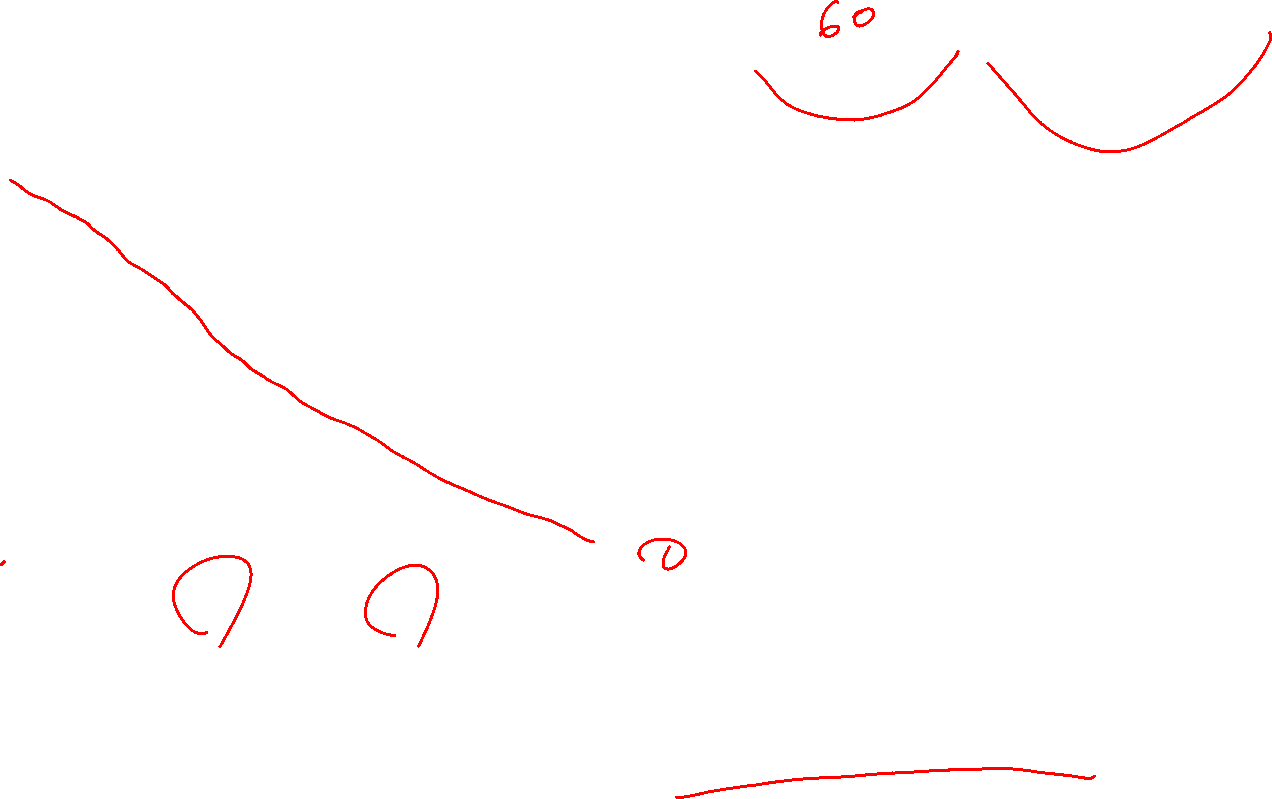
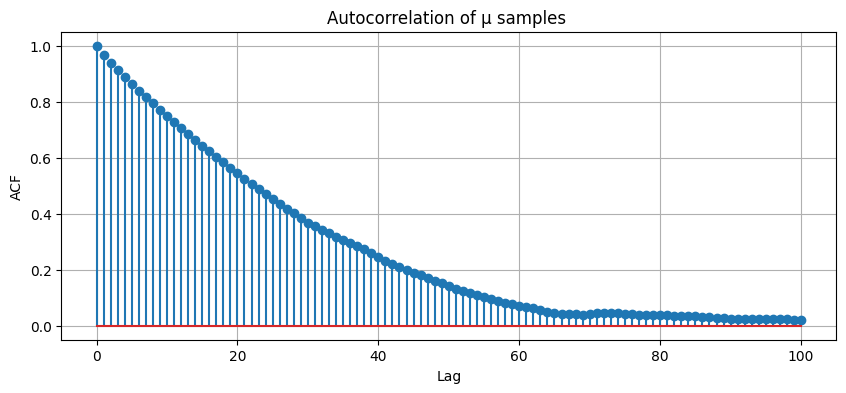


### Slide 27: (Untitled)

- 2
- 마르코프 체인 몬테카를로(MCMC) 추정
- 에 따른 의 추론 결과
- 사전 분포(Prior)에 따른 사후 분포(Posterior) 결과 비교

**Equation 27.1**
$$
𝜎𝜇2
$$

**Equation 27.2**
$$
𝜇
$$

**Equation 27.3**
$$
𝜇~𝑁(10, 𝜎𝜇2)
$$

**Equation 27.4**
$$
𝜇~𝑁(10, 𝜎𝜇2)
$$

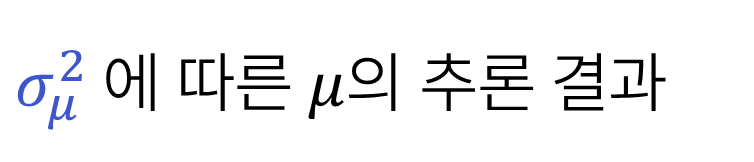
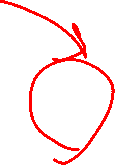
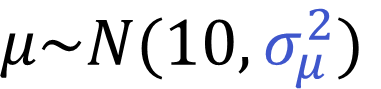
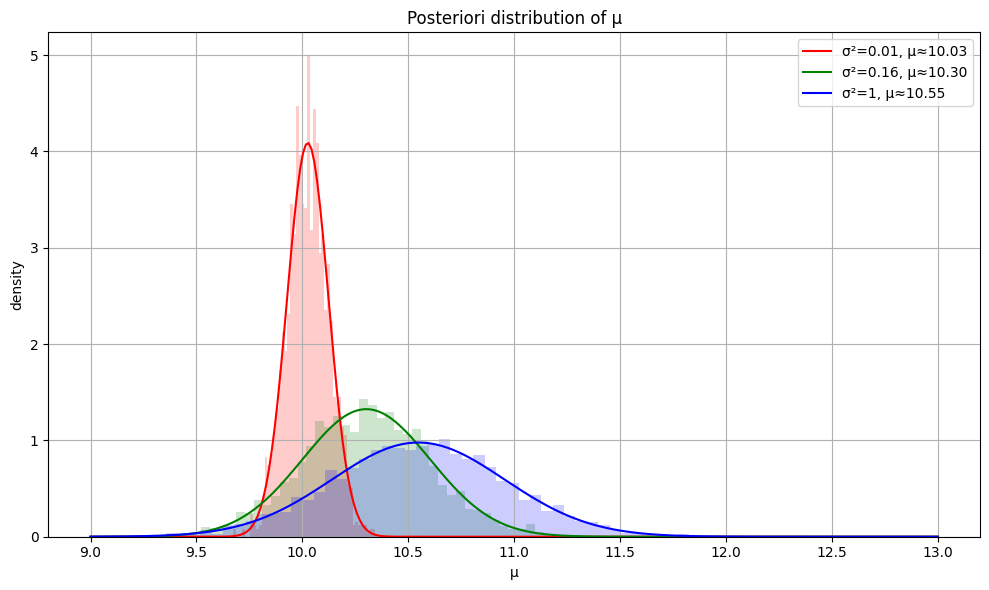


### Slide 28: (Untitled)

- 문제 풀이
- 3
- EM 알고리즘은 잠재변수가 존재하는 확률 모델에서 모수 추정을 위한 방법이다.
- 1
- EM 알고리즘은 초기값에 상관 없이 항상 동일한 추정 결과를 얻을 수 있다.
- 2
- M-step 은 기대 로그 우도 함수 를 최대화하는 를 도출한다.
- 3
- E-step 은 관측값(X)과 θ 일 때 잠재 변수 분포를 바탕으로, 완전 로그 우도 함수 의 기대값을 도출하는 단계이다.
- 4
- Q1. 다음 중 기대값 최대화(EM) 알고리즘에 대한 설명으로 옳지 않은 것은 무엇인가?

**Equation 28.1**
$$
𝑄(𝜃|𝜃′)
$$

**Equation 28.2**
$$
𝜃′
$$

**Equation 28.3**
$$
log𝑃𝐗,𝐙𝜃′
$$

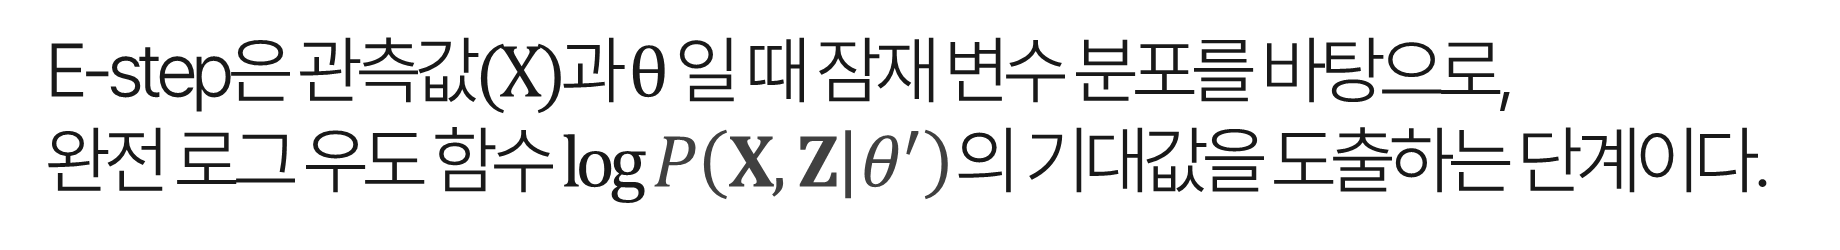
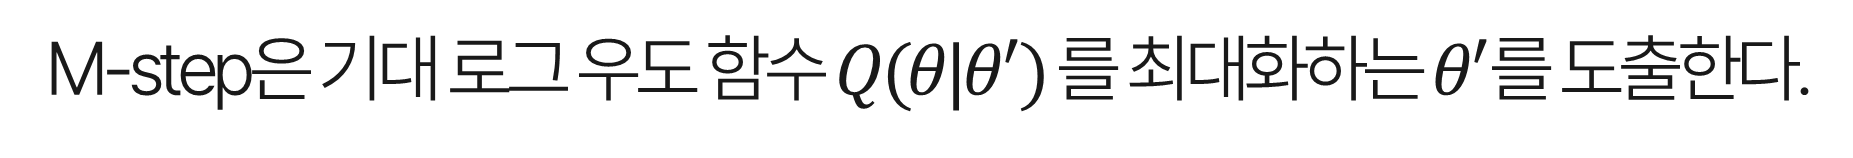


### Slide 29: (Untitled)

- 문제 풀이
- 3
- EM 알고리즘은 잠재변수가 존재하는 확률 모델에서 모수 추정을 위한 방법이다.
- 1
- EM 알고리즘은 초기값에 상관 없이 항상 동일한 추정 결과를 얻을 수 있다.
- 2
- Q1. 다음 중 기대값 최대화(EM) 알고리즘에 대한 설명으로 옳지 않은 것은 무엇인가?
- EM 알고리즘은 전역 최적을 보장하지 않기 때문에
- 초기값에 따라 결과에 차이가 납니다.
- M-step 은 기대 로그 우도 함수 를 최대화하는 를 도출한다.
- 3
- 4
- E-step 은 관측값(X)과 θ 일 때 잠재 변수 분포를 바탕으로, 완전 로그 우도 함수 의 기대값을 도출하는 단계이다.

**Equation 29.1**
$$
𝑄(𝜃|𝜃′)
$$

**Equation 29.2**
$$
𝜃′
$$

**Equation 29.3**
$$
log𝑃𝐗,𝐙𝜃′
$$

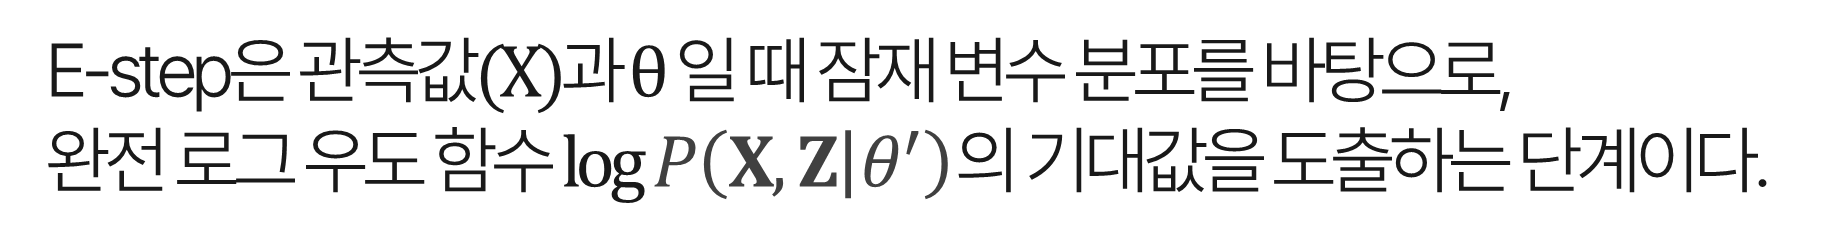
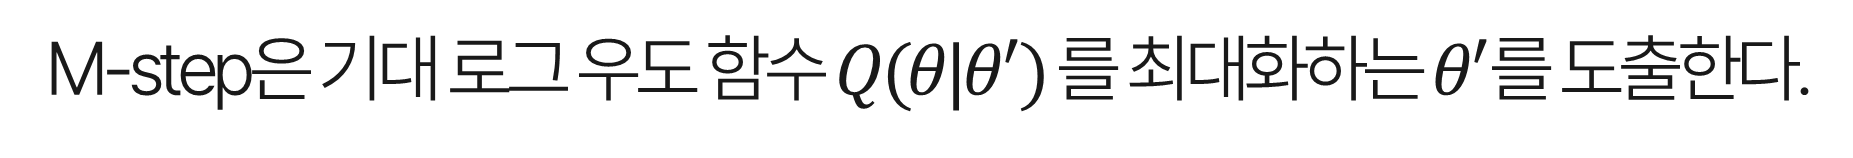


### Slide 30: (Untitled)

- 문제 풀이
- 3
- MCMC 는 임의의 분포에서 직접 샘플링하기 어려운 경우,
- 마르코프 체인을 구성하여 대상 분포에 수렴하도록 반복 샘플링 하는 방법이다.
- 1
- 마르코프 체인은 현재 상태가 주어지면 과거 상태와 무관하게 다음 상태의 분포가 결정되는 조건부 독립성을 가진다.
- 2
- 메트로폴리스-헤이스팅스 알고리즘에서는 새로운 후보 샘플의 수락 확률이
- 현재 상태의 비율과 제안 분포 비율에 의해 결정된다.
- 3
- MCMC 에서 생성된 체인은 충분한 반복 후 정상 상태(stationary distribution)에 도달하면,
- 모든 샘플들이 서로 독립이라는 성질을 갖는다.
- 4
- Q2. 다음 중 마르코프 체인 몬테카를로(MCMC) 방법에 대한 설명으로 옳지 않은 것은 무엇인가?


### Slide 31: (Untitled)

- 문제 풀이
- 3
- MCMC 는 임의의 분포에서 직접 샘플링하기 어려운 경우,
- 마르코프 체인을 구성하여 대상 분포에 수렴하도록 반복 샘플링 하는 방법이다.
- 1
- 마르코프 체인은 현재 상태가 주어지면 과거 상태와 무관하게 다음 상태의 분포가 결정되는 조건부 독립성을 가진다.
- 2
- 메트로폴리스-헤이스팅스 알고리즘에서는 새로운 후보 샘플의 수락 확률이
- 현재 상태의 비율과 제안 분포 비율에 의해 결정된다.
- 3
- MCMC 에서 생성된 체인은 충분한 반복 후 정상 상태(stationary distribution)에 도달하면,
- 모든 샘플들이 서로 독립이라는 성질을 갖는다.
- 4
- Q2. 다음 중 마르코프 체인 몬테카를로(MCMC) 방법에 대한 설명으로 옳지 않은 것은 무엇인가?
- 정상 상태는 실제 분포에 도달한 상태이고,
표본 간에 독립이 되었다고 할 수 없기 때문에 Trimming 이 필요합니다.

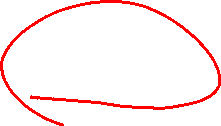


### Slide 32: (Untitled)

- # 기대값 최대화
- # 몬테카를로 방법
- # 마르코프 체인
- 추후 디자인하여 PSD 로 편집될 영역입니다.
